# Load libraries

In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

### Load dataset

In [2]:
# Load the dataset
file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Drop column = 'id'
data.drop(columns='id', inplace=True)

Drop kolom 'id'

## Summarize Data (EDA)

In [5]:
# Desciptive statistics
print("\nStatistika Deskriptif Variabel Numerik")
data.describe().transpose()


Statistika Deskriptif Variabel Numerik


,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
print("\nStatistika Deskriptif Variabel Kategorik")
data.describe(include=object).transpose()


Statistika Deskriptif Variabel Kategorik


,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


# Visualisasi Data

## Variabel Numerik

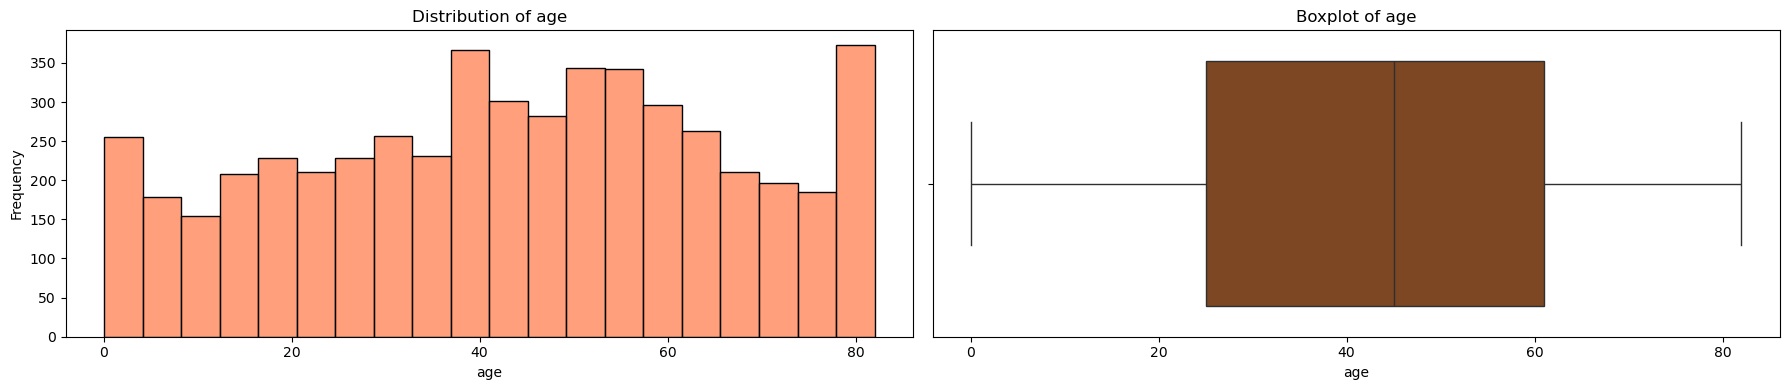

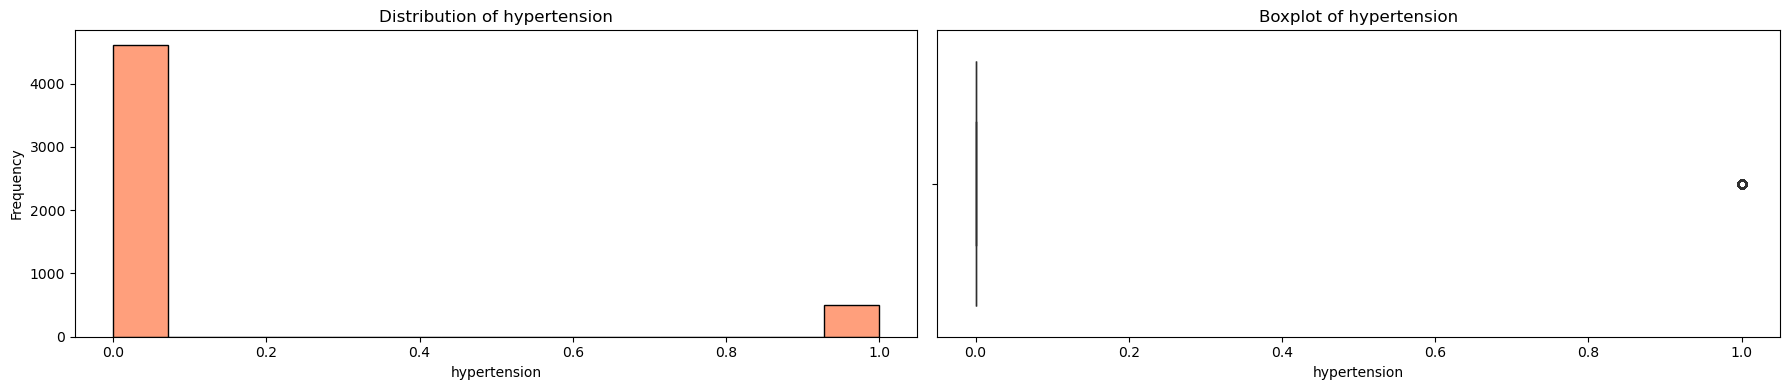

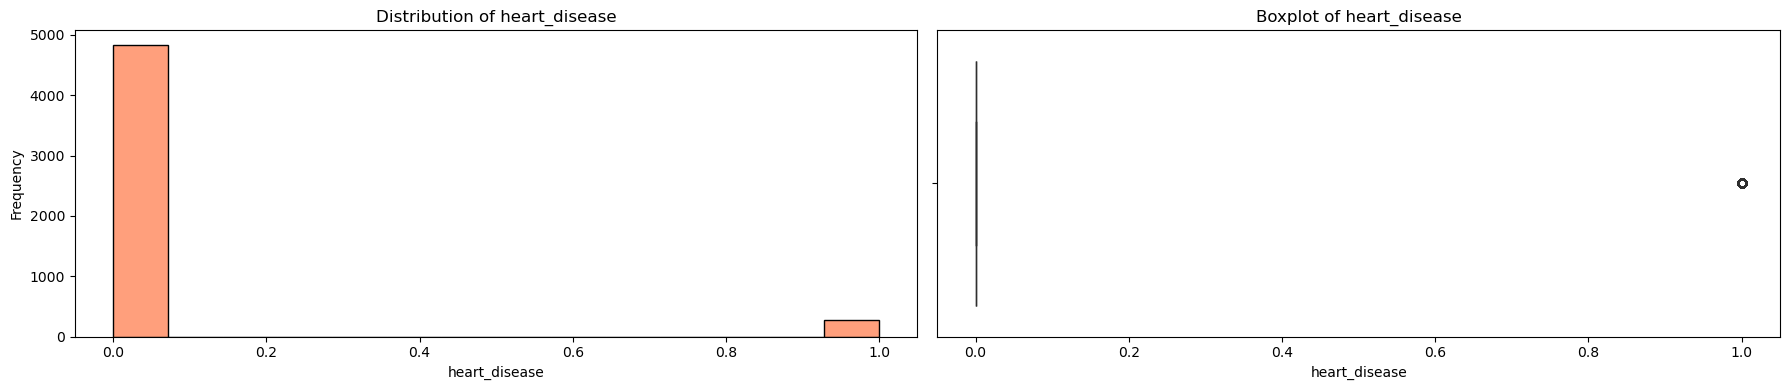

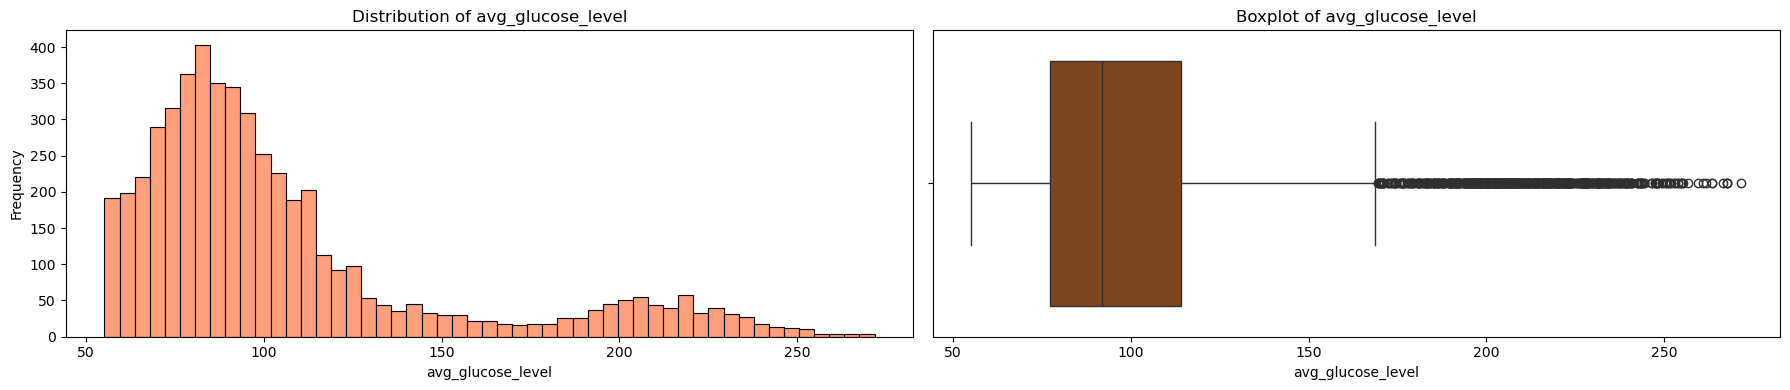

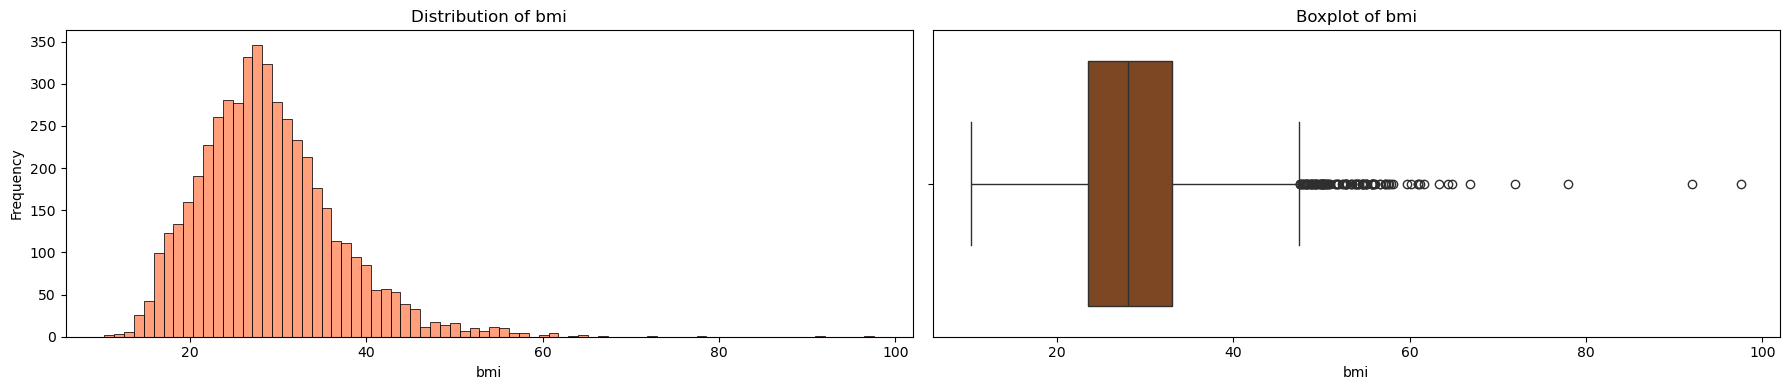

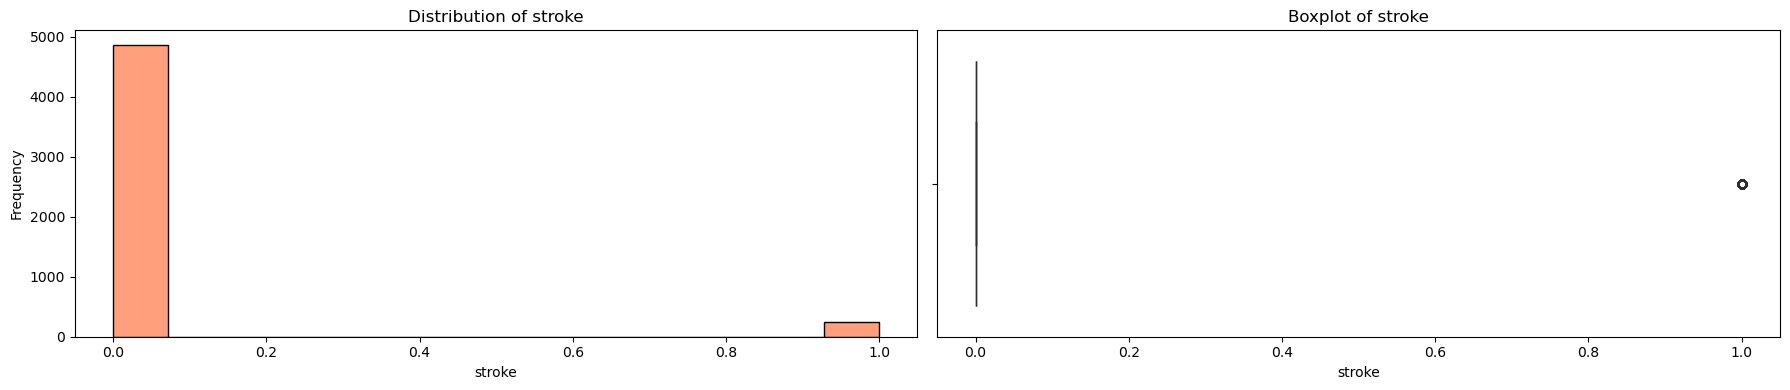

In [7]:
num_columns = data.select_dtypes(include=['number']).columns
for column in num_columns :
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

    # Histogram 
    sns.histplot(data[column], kde=False, color='coral', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=data[column], color='saddlebrown', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3773423795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette='flare')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3773423795.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3773423795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette='flare')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3773423795.py:10: UserWarning: set_ticklabels() sh

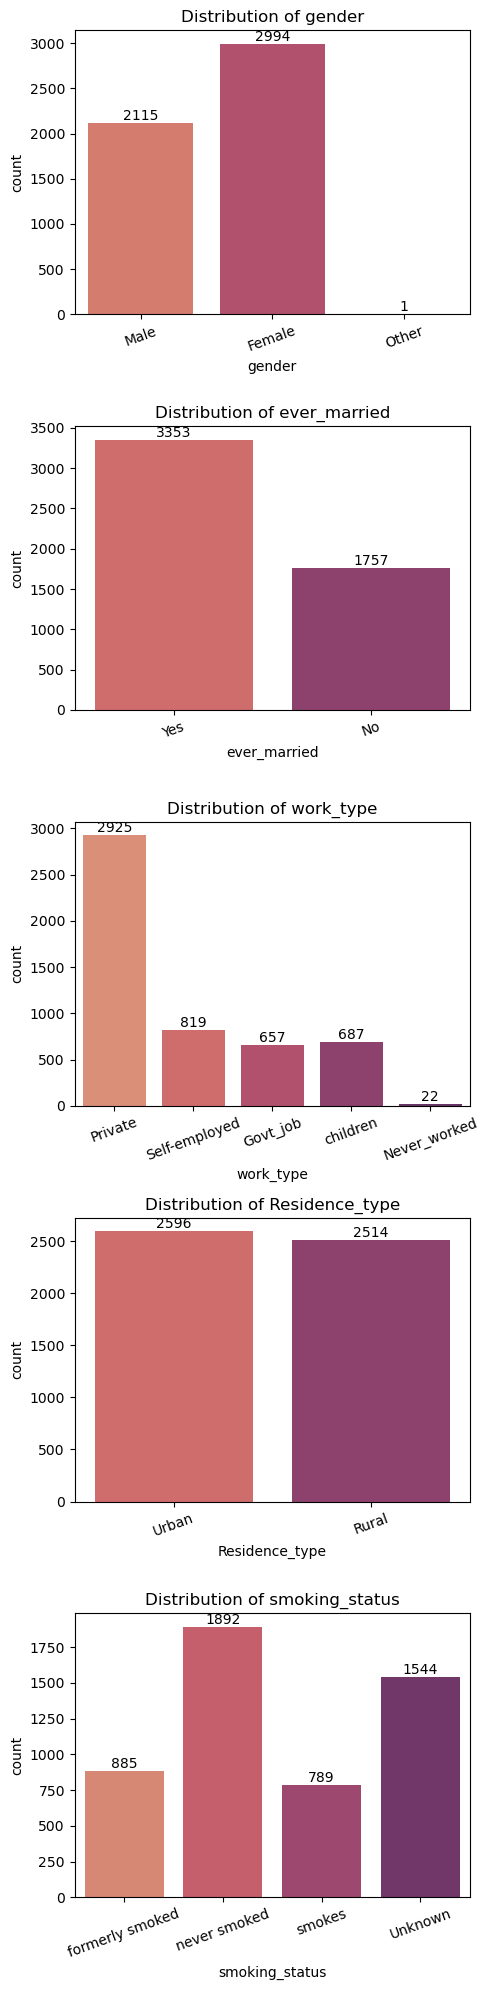

In [8]:
# Variabel Kategorik
# Bar Plot
categorical_cols = data.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(5, 1, figsize=(5, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i], palette='flare')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

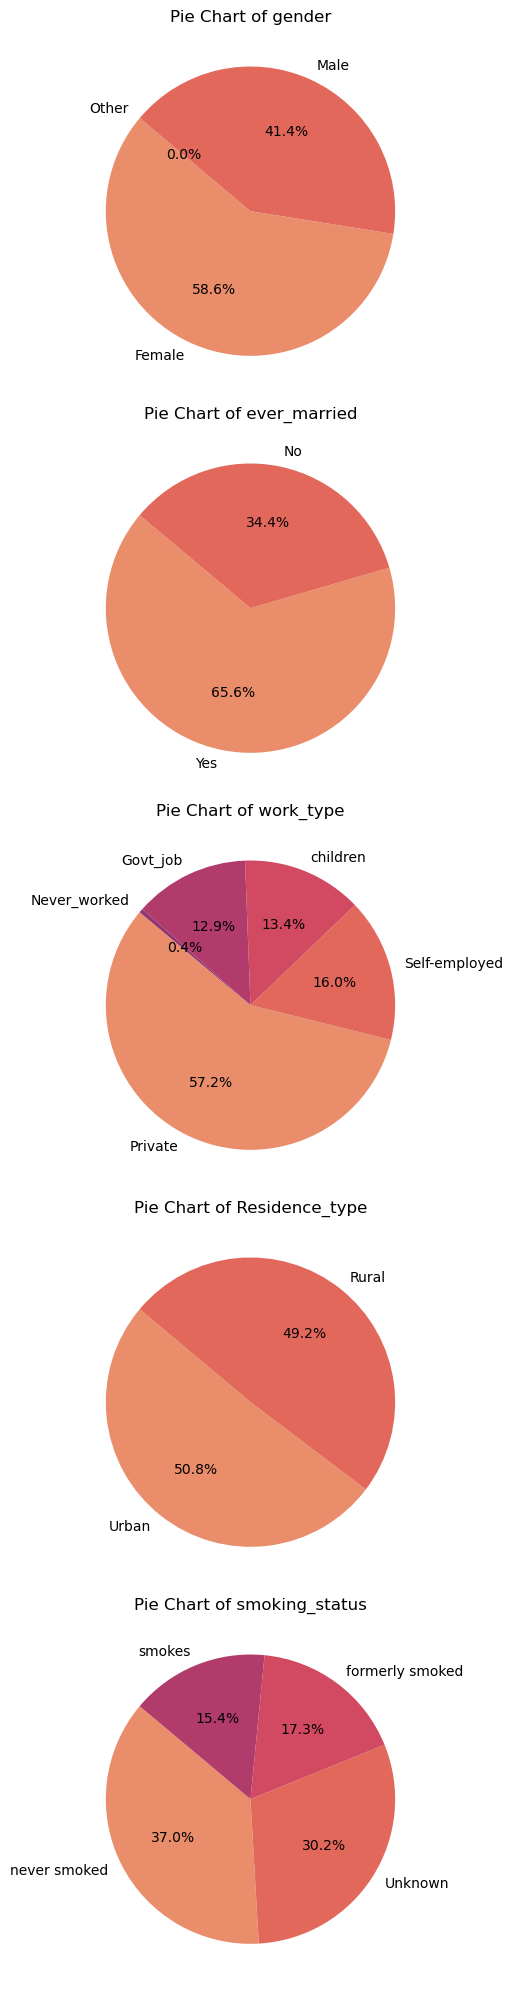

In [9]:
# Pie Chart
fig, axes = plt.subplots(len(categorical_cols),1, figsize=(5, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('flare'))
    axes[i].set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

# Pre Processing Data

### Data Duplikat

In [10]:
## Cek data duplikat
# Memeriksa duplikat berdasarkan semua kolom
display("Data Duplikat: %s" %data.duplicated().sum())

# Menghapus duplikat berdasarkan semua kolom
data_cleaned = data.drop_duplicates()

# Menampilkan informasi setelah menghapus duplikat
print("\nInformasi setelah menghapus duplikat:")
data_cleaned.info()

'Data Duplikat: 0'


Informasi setelah menghapus duplikat:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Hasil pengecekan menunjukkan bahwa tidak terdapat data duplikat

### Missing Value

In [11]:
# Cek Missing Value
data.isna().sum()/len(data)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Dapat dilihat bahwa terdapat sekitar 3.9% missing value pada data bmi sehingga dilakukan imputasi menggunakan decision tree berdasarkan gender dan age.

BMI (Body Mass Index) adalah indeks yang digunakan untuk mengevaluasi proporsi antara berat badan seseorang dengan tinggi badan mereka.

Penggunaan decision tree untukimputasi missing value pata BMI berdasarkan gender dan usia dipilih karena metode ini bisa menyesuaikan imputasi sesuai dengan perbedaan karakteristik antara laki-laki dan perempuan serta perubahan BMI seiring bertambahnya usia.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Missing value bmi < 4%
# dilakukan imputasi menggunakan decision tree berdasarkan gender dan age
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = data[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
data.loc[Missing.index,'bmi'] = predicted_bmi

# Cek Missing Value
data.isna().sum()/len(data)*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Setelah dilakukan imputasi, terlihat bahwa sudah tidka terdapat missing value

### Cleaning data Kategorik

Dilakukan cleaning data kategorik dengan mengubah nama variabel yang menggunakan spasi menjadi _ untuk memudahkan analisis

In [13]:
#Cleaning Categorical Data in our data set
categorical = list(data.dtypes[data.dtypes == 'object'].index)
categorical

for col in categorical:
    data[col] = data[col].str.lower().str.replace(" ", "_")
    
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,29.879487,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1


### Unique Value pada Data Kategorik

Dilakukan pengecekan terhadap unique value dari setiap variabel kategorik

In [14]:
#Checkin the unique values in categorical columns
for col in categorical:
    print(col)
    print(data[col].unique())
    print("Number of unique classes ",data[col].nunique())
    print('\n')

gender
['male' 'female' 'other']
Number of unique classes  3


ever_married
['yes' 'no']
Number of unique classes  2


work_type
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
Number of unique classes  5


Residence_type
['urban' 'rural']
Number of unique classes  2


smoking_status
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']
Number of unique classes  4




### Menghapus gender other

In [15]:
# Drop the row with 'Other' for 'gender'
data = data[data['gender'] != 'other']

Diputuskan untuk menghapus gender other karena dianggap bahwa data tersebut tidak akan mempengaruhi pemodelan

## Cleaning Data Numerik

### Cek Variabel Negatif

In [16]:
#Checking for negative values in Numerical Columns
numerical = [col for col in data.columns if col not in categorical]
for i in numerical:
    data[data[i]<0]
    print("Records with Negative values in %s : " %i,data[data[i]<0])
    print('\n')

Records with Negative values in age :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in hypertension :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in heart_disease :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in avg_glucose_level :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in bmi :  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Res

Tidak terdapat variabel numerik yang negatif dalam data

### Cek data = 0

In [17]:
print(data[data['age']==0])
print(data[data['avg_glucose_level']==0])
print(data[data['bmi']==0])

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Tidak terdapat variabel numerik yang bernilai 0 pada data

### Ubah tipe data numerik menjadi kategorik

In [18]:
# Mengubah tipe data kolom menjadi object
data['hypertension'] = data['hypertension'].astype('object')
data['heart_disease'] = data['heart_disease'].astype('object')
data['stroke'] = data['stroke'].astype('object')

# Memeriksa tipe data setelah perubahan
print(data.dtypes)

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object


Dilakukan perubahan tipe data untuk variabel hipertensi, heart disease, dan stroke karena merupakan variabel kategorik untuk memudahkan EDA

### Data Outlier

Pengecekan outlier dilakukan menggunakan boxplot, terlihat bahwa terdapat beberapa data outlier, sehingga untuk data outlier dihapus menggunakan IQR

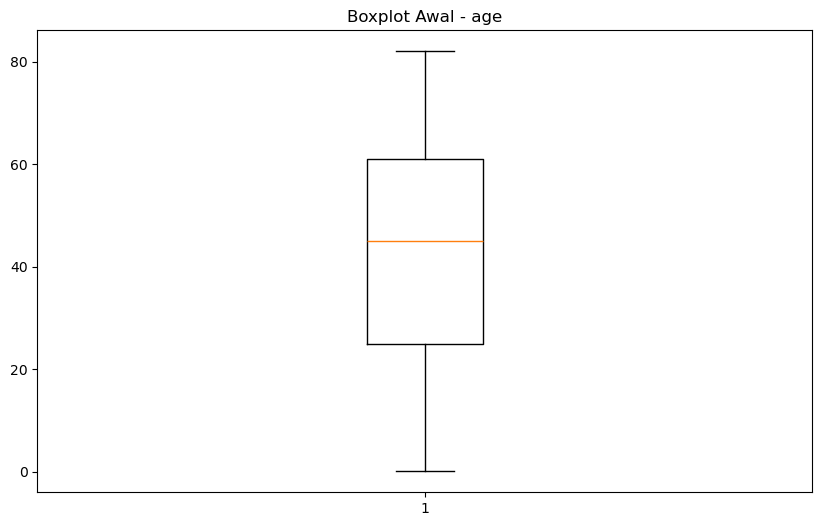

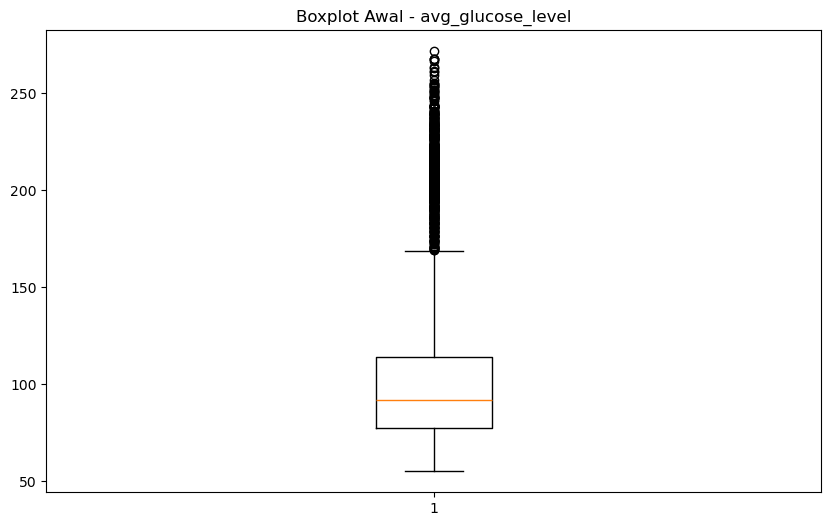

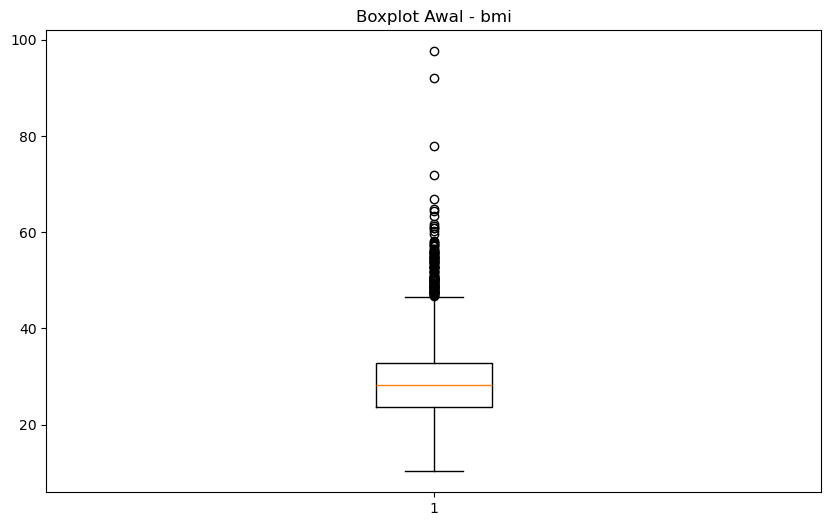

In [19]:
## Cek Boxplot
# Fungsi untuk membuat boxplot
def buat_boxplot(data, judul):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data)
    plt.title(judul)
    plt.show()

    
# Mengambil kolom dengan tipe data numerik (integer dan float)
numerik_data = data.select_dtypes(include=[np.number])
    
# Plot boxplot awal untuk setiap kolom numerik
for kolom in numerik_data.columns:
    buat_boxplot(numerik_data[kolom], f'Boxplot Awal - {kolom}')

In [20]:
### hapus outlier menggunakan IQR

# Fungsi untuk menghapus outlier menggunakan IQR
def hapus_outlier_iqr(data, kolom):
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    data_terfilter = data[(data[kolom] >= batas_bawah) & (data[kolom] <= batas_atas)]
    return data_terfilter

# Hapus outlier untuk setiap kolom numerik
numerik_data_terfilter = numerik_data.copy()
for kolom in numerik_data.columns:
    numerik_data_terfilter = hapus_outlier_iqr(numerik_data_terfilter, kolom)

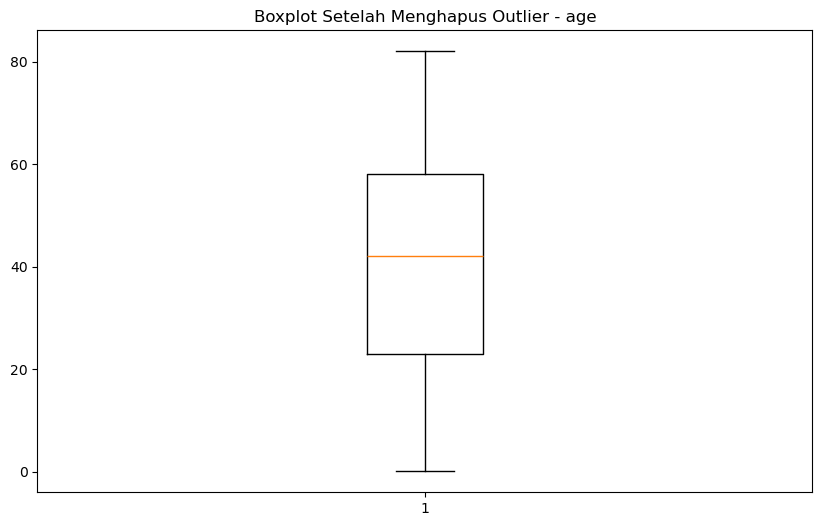

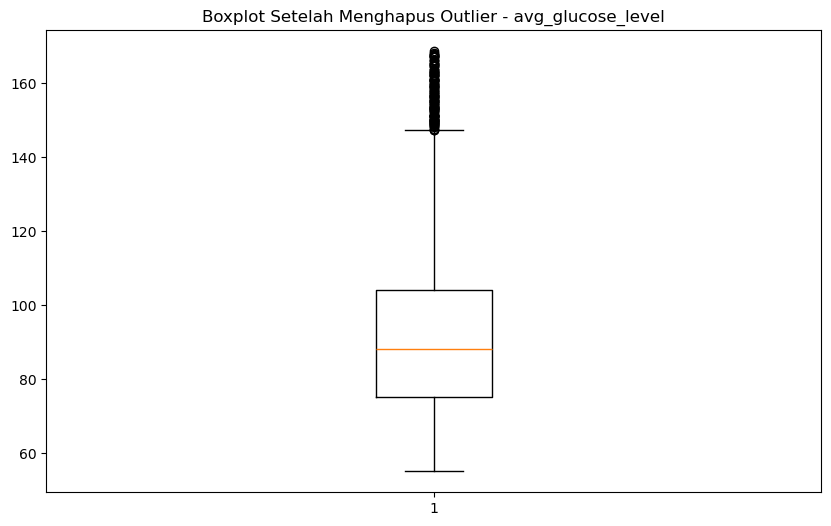

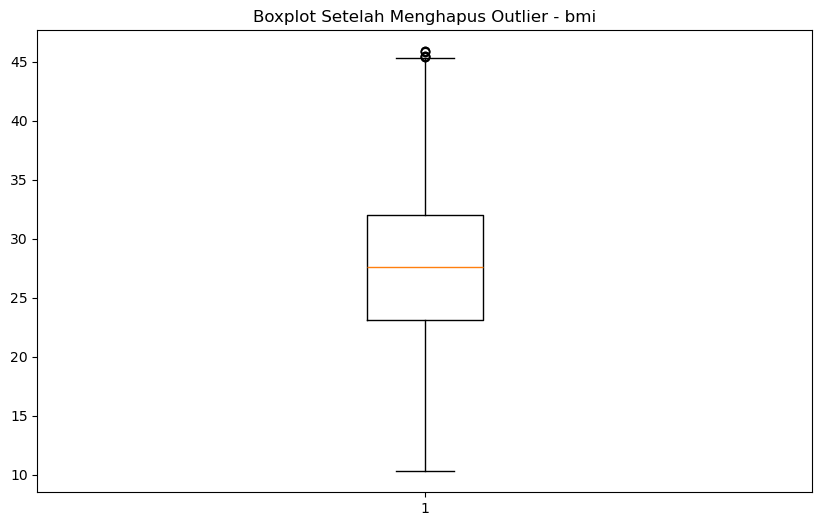

In [21]:
# Plot boxplot setelah menghapus outlier untuk setiap kolom numerik
for kolom in numerik_data_terfilter.columns:
    buat_boxplot(numerik_data_terfilter[kolom], f'Boxplot Setelah Menghapus Outlier - {kolom}')


In [22]:
# Menggabungkan kembali dengan kolom kategorikal
kategori_data = data.select_dtypes(include=['object'])
hasil_data = pd.concat([numerik_data_terfilter, kategori_data], axis=1)

# Menampilkan beberapa baris dari dataframe hasil
hasil_data = hasil_data.dropna()
hasil_data.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
2,80.0,105.92,32.500000,male,0,1,yes,private,rural,never_smoked,1
6,74.0,70.09,27.400000,male,1,1,yes,private,rural,never_smoked,1
7,69.0,94.39,22.800000,female,0,0,no,private,urban,never_smoked,1
8,59.0,76.15,30.556098,female,0,0,yes,private,rural,unknown,1
9,78.0,58.57,24.200000,female,0,0,yes,private,urban,unknown,1


In [23]:
hasil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4385 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4385 non-null   float64
 1   avg_glucose_level  4385 non-null   float64
 2   bmi                4385 non-null   float64
 3   gender             4385 non-null   object 
 4   hypertension       4385 non-null   object 
 5   heart_disease      4385 non-null   object 
 6   ever_married       4385 non-null   object 
 7   work_type          4385 non-null   object 
 8   Residence_type     4385 non-null   object 
 9   smoking_status     4385 non-null   object 
 10  stroke             4385 non-null   object 
dtypes: float64(3), object(8)
memory usage: 411.1+ KB


Setelah dilakukan penghapusan outlier, diperoleh data bersih dengan 11 variabel dan 4385 data pengamatan

# Data Bersih

## EDA

In [24]:
# Desciptive statistics
print("\nStatistika Deskriptif Variabel Numerik")
hasil_data.describe().transpose()


Statistika Deskriptif Variabel Numerik


,count,mean,std,min,25%,50%,75%,max
age,4385.0,40.891986,22.561044,0.08,23.00,42.00,58.00,82.00
avg_glucose_level,4385.0,91.478100,22.658576,55.12,75.08,88.05,104.02,168.68
bmi,4385.0,27.795375,6.575149,10.30,23.10,27.60,32.00,45.90


In [25]:
print("\nStatistika Deskriptif Variabel Kategorik")
hasil_data.describe(include=object).transpose()


Statistika Deskriptif Variabel Kategorik


,count,unique,top,freq
gender,4385,2,female,2586
hypertension,4385,2,0,4059
heart_disease,4385,2,0,4213
ever_married,4385,2,yes,2731
work_type,4385,5,private,2476
Residence_type,4385,2,urban,2227
smoking_status,4385,4,never_smoked,1593
stroke,4385,2,0,4220


In [26]:
#statistik deskriptif variabel numerik dengan pengelompokan berdasarkan 'not.fully.paid'
descriptive_stats = hasil_data.groupby('stroke').describe().transpose()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

descriptive_stats

stroke                             0           1
age               count  4220.000000  165.000000
                  mean     39.879393   66.789818
                  std      22.224573   14.092372
                  min       0.080000    1.320000
                  25%      22.000000   58.000000
                  50%      41.000000   71.000000
                  75%      57.000000   78.000000
                  max      82.000000   82.000000
avg_glucose_level count  4220.000000  165.000000
                  mean     91.465334   91.804606
                  std      22.589715   24.425124
                  min      55.120000   56.110000
                  25%      75.182500   74.020000
                  50%      88.055000   87.850000
                  75%     103.925000  104.860000
                  max     168.680000  167.410000
bmi               count  4220.000000  165.000000
                  mean     27.745963   29.059122
                  std       6.622621    5.070368
                  min      10.300000   16.900000
                  25%      23.000000   26.200000
                  50%      27.500000   28.900000
                  75%      32.004751   31.400000
                  max      45.900000   45.900000

In [27]:
#statistik deskriptif variabel kategorik dengan pengelompokan berdasarkan 'not.fully.paid'
cat_columns = hasil_data.select_dtypes(include=['object', 'category']).columns
for column in cat_columns:
    grouped = hasil_data.groupby(['stroke', column]).size().unstack(fill_value=0)
    display(grouped)

gender,female,male
stroke,,
0,2488,1732
1,98,67


hypertension,0,1
stroke,,
0,3931,289
1,128,37


heart_disease,0,1
stroke,,
0,4069,151
1,144,21


ever_married,no,yes
stroke,,
0,1630,2590
1,24,141


work_type,children,govt_job,never_worked,private,self-employed
stroke,,,,,
0,673,530,22,2383,612
1,2,21,0,93,49


Residence_type,rural,urban
stroke,,
0,2081,2139
1,77,88


smoking_status,formerly_smoked,never_smoked,smokes,unknown
stroke,,,,
0,659,1535,641,1385
1,47,58,26,34


stroke,0,1
stroke,,
0,4220,0
1,0,165


### Visualisasi Data Bersih

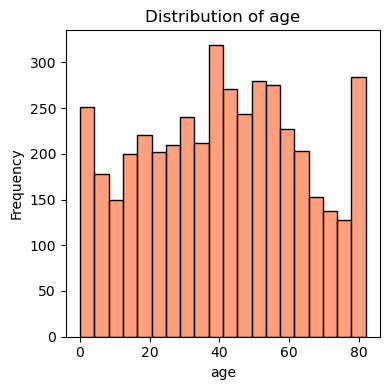

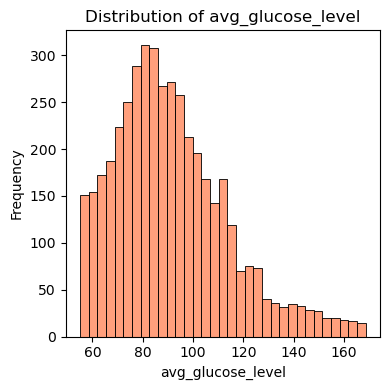

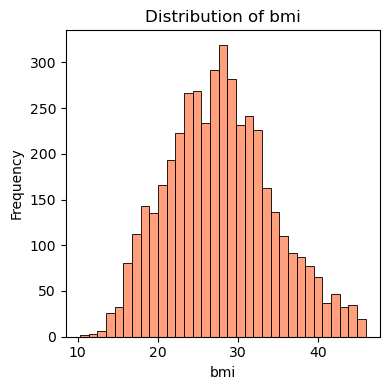

In [28]:
# Variabel Numerik
num_columns = hasil_data.select_dtypes(include=['number']).columns
for column in num_columns :
    fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

    # Histogram 
    sns.histplot(hasil_data[column], kde=False, color='coral', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


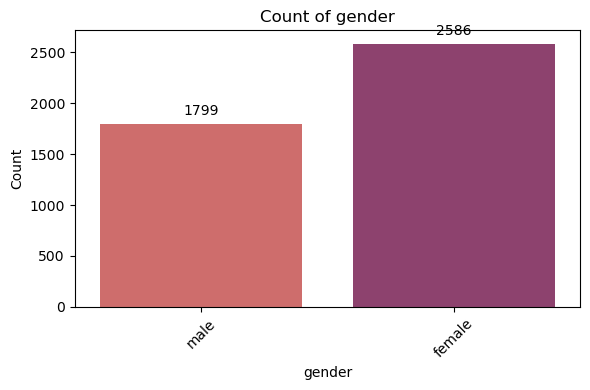

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


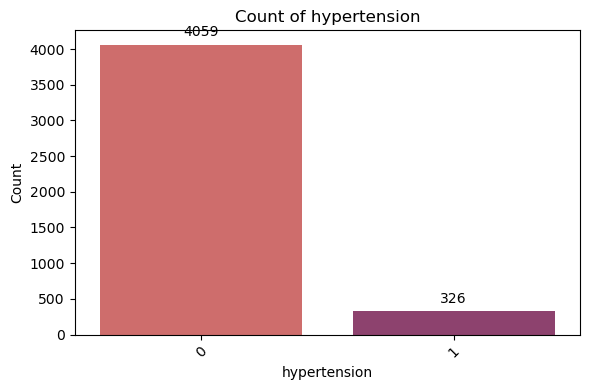

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


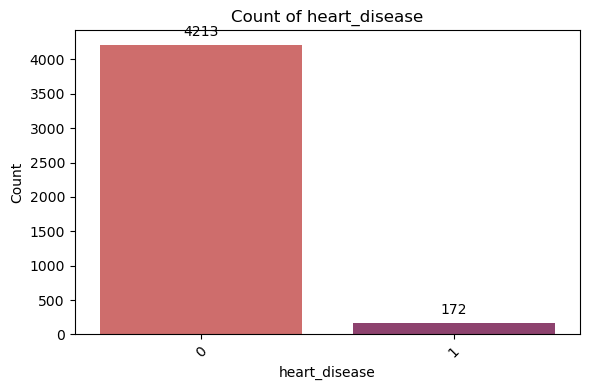

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


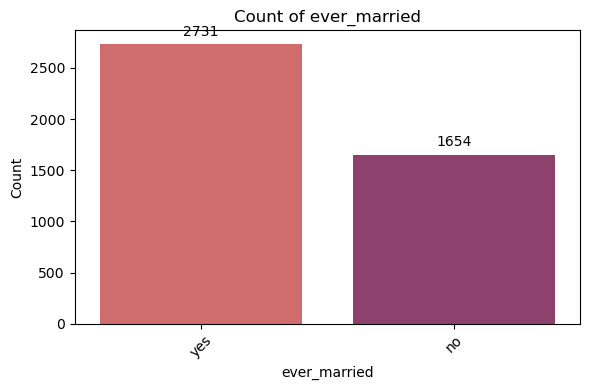

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


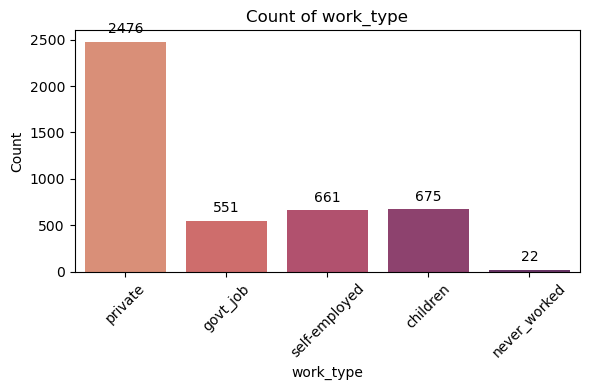

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


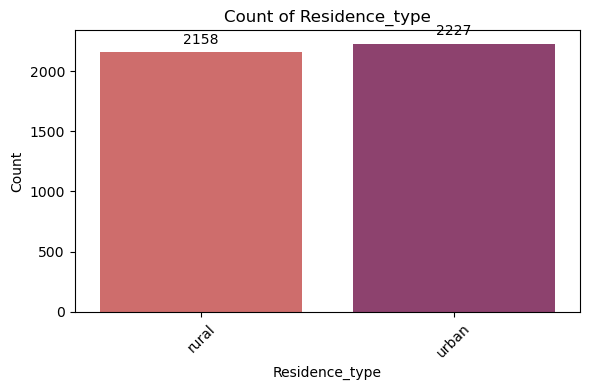

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


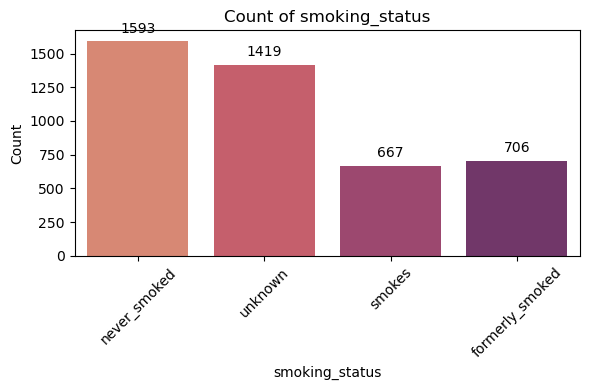

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\2246308655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=hasil_data, palette='flare')


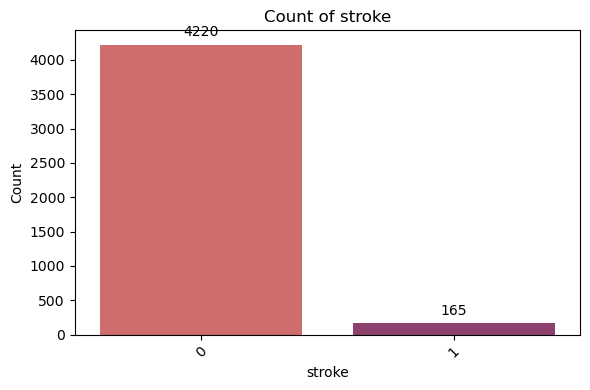

In [29]:
# Pilih kolom kategorik
cat_columns = hasil_data.select_dtypes(include=['object', 'category']).columns

# Plot count plot untuk setiap kolom kategorik
for column in cat_columns:
    plt.figure(figsize=(6, 4))  # Ukuran gambar dapat disesuaikan
    ax = sns.countplot(x=column, data=hasil_data, palette='flare')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotasi label sumbu x jika perlu

    # Menambahkan label pada bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plt.tight_layout()
    plt.show()

### Multivariate visualization

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='stroke', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='stroke', y=column, data=data, palette=cmap, ax=axes[0])


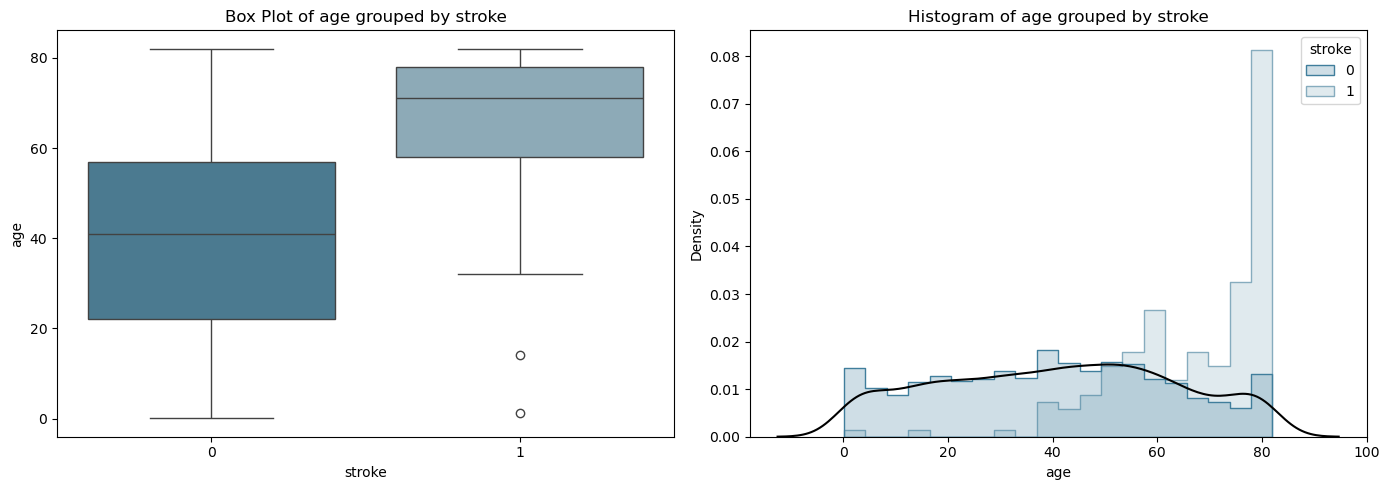

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='stroke', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='stroke', y=column, data=data, palette=cmap, ax=axes[0])


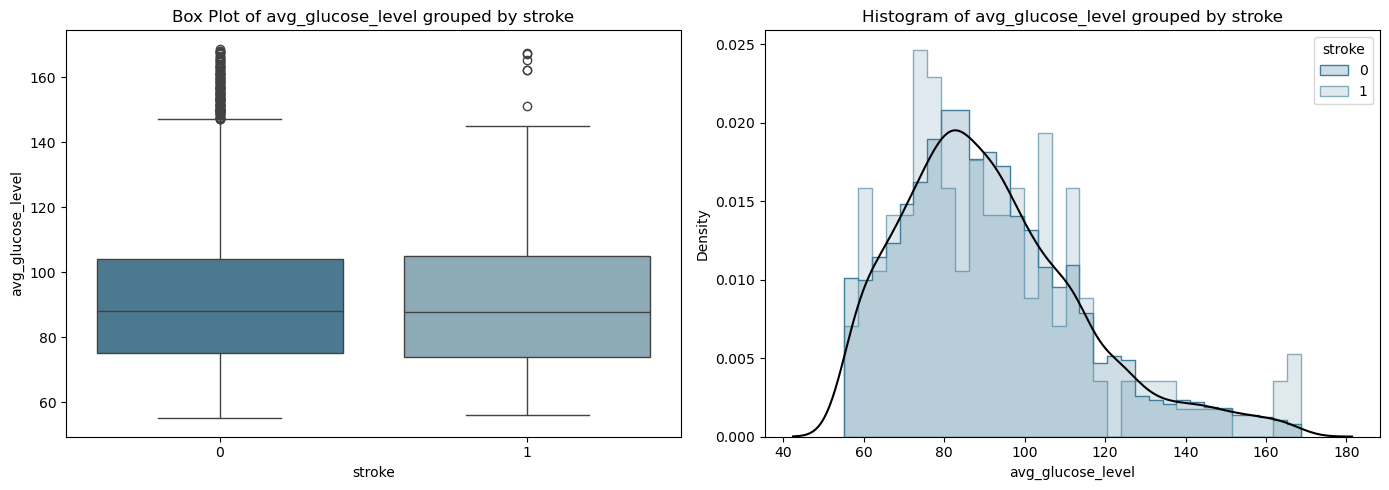

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='stroke', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_12784\3872325585.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='stroke', y=column, data=data, palette=cmap, ax=axes[0])


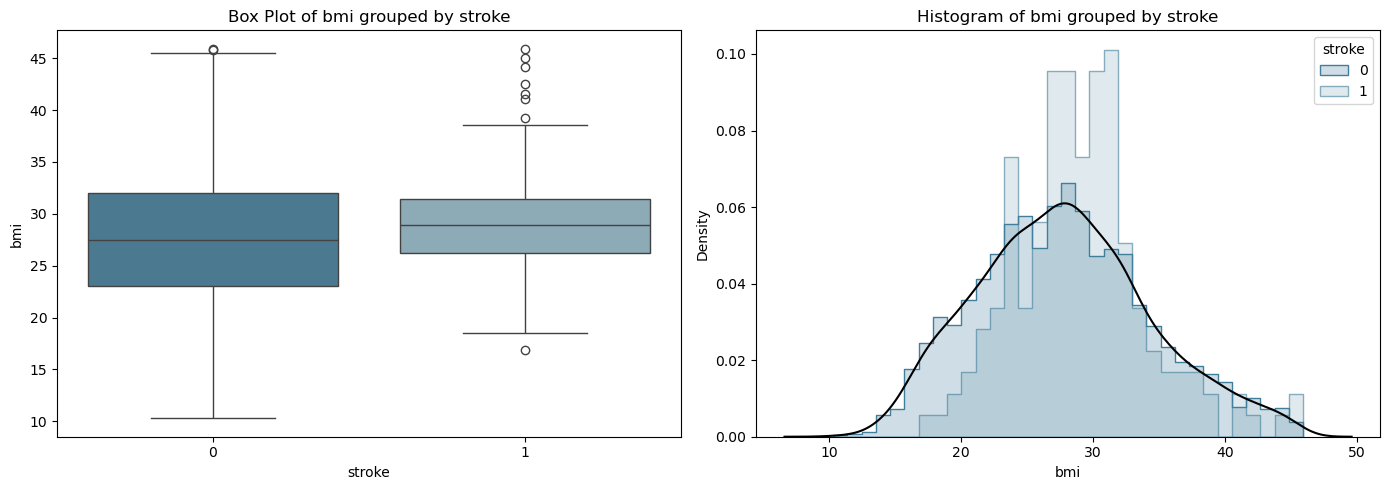

In [30]:
# Visualisasi variabel numerik pengelompokan berdasarkan stroke
data = hasil_data
cmap = sns.diverging_palette(230, 20, as_cmap=False)
for column in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
      # Histogram
    sns.histplot(data=data, x=column, hue='stroke', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
    sns.kdeplot(data=data[column], color='black', ax=axes[1])
    axes[1].set_title(f'Histogram of {column} grouped by stroke')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')
    
    # Boxplot
    sns.boxplot(x='stroke', y=column, data=data, palette=cmap, ax=axes[0])
    axes[0].set_title(f'Box Plot of {column} grouped by stroke')
    axes[0].set_xlabel('stroke')
    axes[0].set_ylabel(column)
    
    plt.tight_layout()
    plt.show()

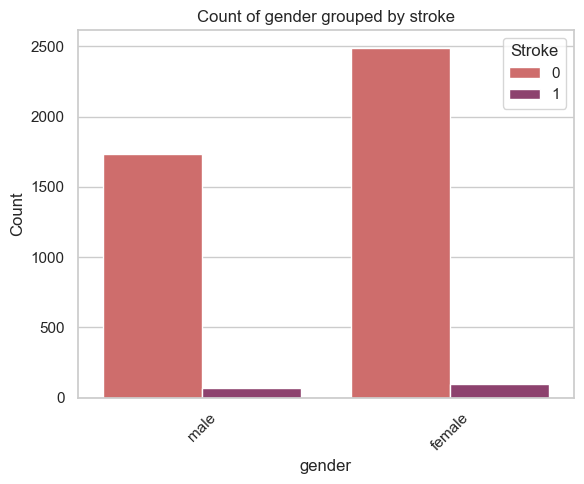

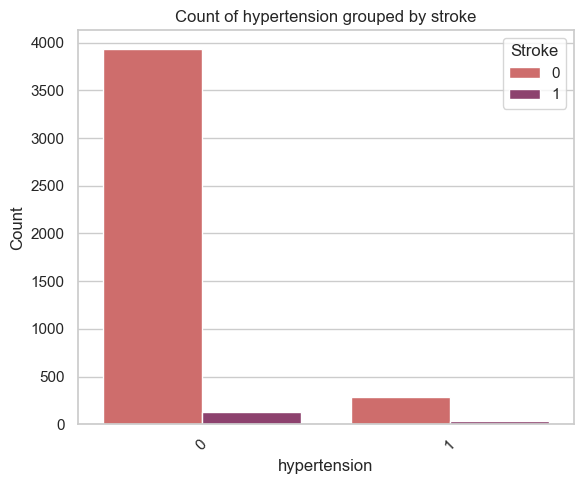

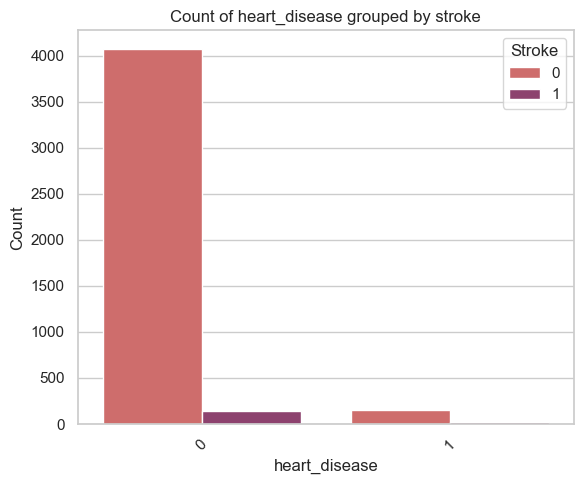

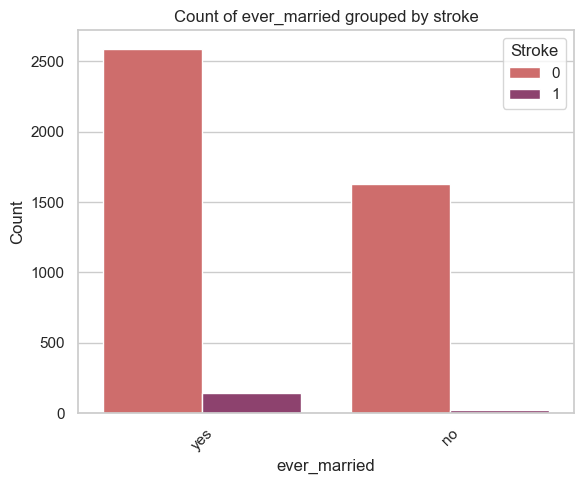

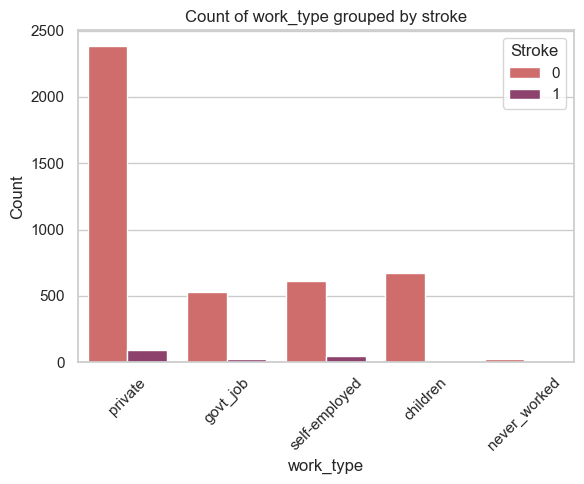

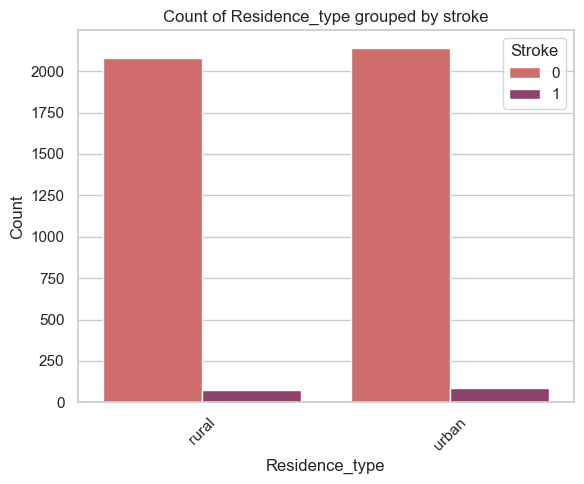

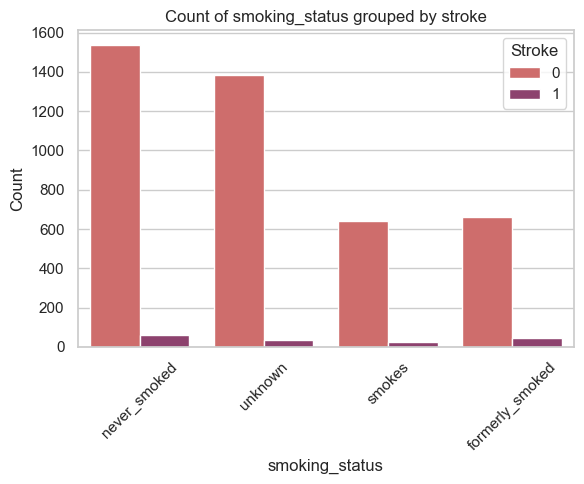

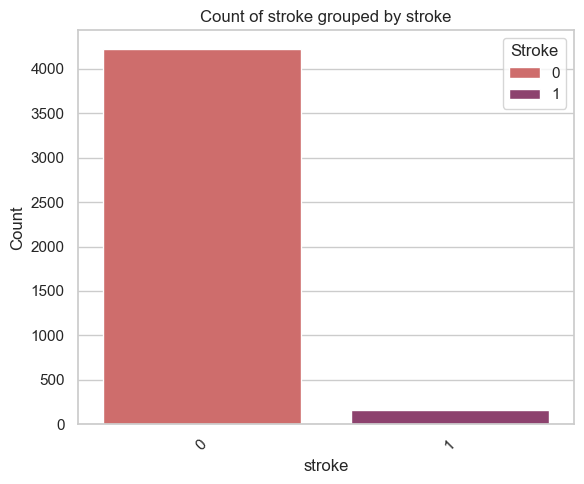

In [31]:
# Visualisasi variabel kategorik dengan pengelompokan berdasarkan 'not.fully.paid'
sns.set(style="whitegrid")

# Memilih kolom kategorik
cat_columns = data.select_dtypes(include=['object', 'category']).columns

# Membuat barchart untuk setiap kolom kategorik
for column in cat_columns:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=column, hue='stroke', data=data, palette='flare')
    plt.title(f'Count of {column} grouped by stroke')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

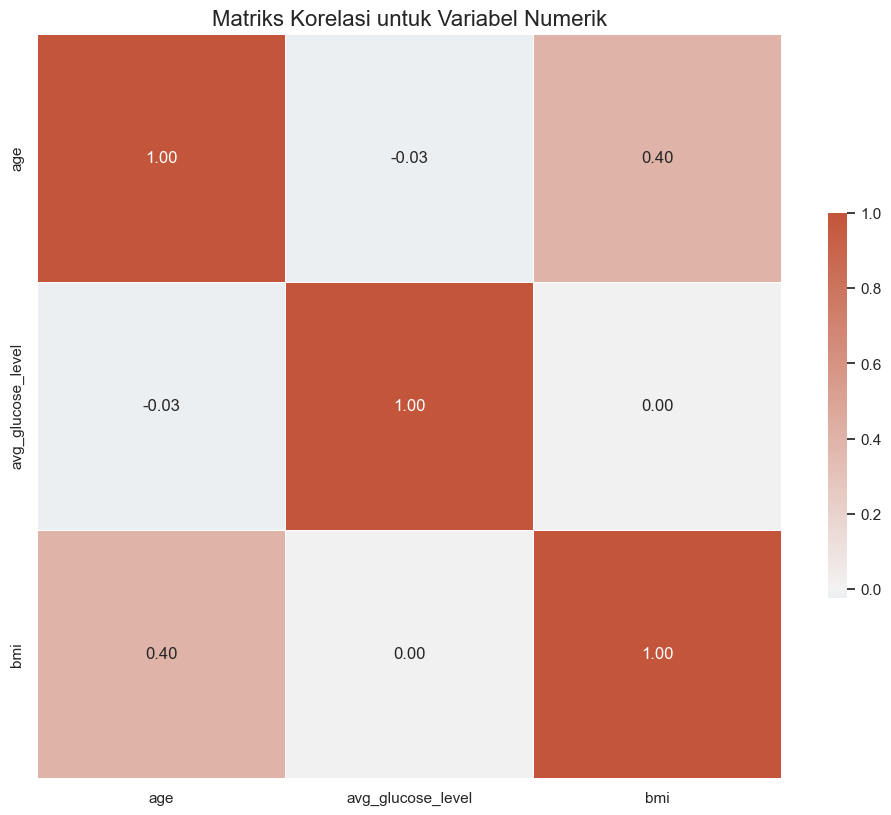

In [32]:
# Hitung matriks korelasi untuk fitur numerik 
num_columns = hasil_data.select_dtypes(include=['number']).columns
corr_matrix = hasil_data[num_columns].corr(method='spearman')

# Siapkan figure matplotlib
plt.figure(figsize=(12, 10))

# Buat colormap diverging custom
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gambar heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriks Korelasi untuk Variabel Numerik', fontsize=16)
plt.show()


## EXPORT DATA BERSIH

Merubah nama dari variabel kategorik yang sebelumnya dummy, export data bersih dilakukan untuk analisis summary statistics dan visualisasi menggunakan RShiny

### Rename Data Kategorik untuk Visualisasi

In [33]:
# Buat salinan data
data_copy = hasil_data.copy()

# Mengubah nilai pada kolom 'hypertension', 'heart_disease', dan 'stroke'
data_copy['hypertension'] = data_copy['hypertension'].replace({0: 'No', 1: 'Yes'})
data_copy['heart_disease'] = data_copy['heart_disease'].replace({0: 'No', 1: 'Yes'})
data_copy['stroke'] = data_copy['stroke'].replace({0: 'No', 1: 'Yes'})

# Menampilkan data yang telah diubah
data_copy.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
2,80.0,105.92,32.500000,male,No,Yes,yes,private,rural,never_smoked,Yes
6,74.0,70.09,27.400000,male,Yes,Yes,yes,private,rural,never_smoked,Yes
7,69.0,94.39,22.800000,female,No,No,no,private,urban,never_smoked,Yes
8,59.0,76.15,30.556098,female,No,No,yes,private,rural,unknown,Yes
9,78.0,58.57,24.200000,female,No,No,yes,private,urban,unknown,Yes


In [34]:
# Export hasil_data menjadi CSV
# data_bersih = data_copy
# data_bersih.to_csv('hasil_data.csv', index=False)

## Encoding Variabel Kategorik

Data yang sudah bersih dilakukan encoding variabel kategorik menjadi dummy

In [125]:
data = hasil_data
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengubah variabel kategorikal menjadi numerik
encoder = LabelEncoder()

data['hypertension'] = encoder.fit_transform(data['hypertension'])
data['heart_disease'] = encoder.fit_transform(data['heart_disease'])
data['stroke'] = encoder.fit_transform(data['stroke'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])

In [126]:
data_encoded = pd.get_dummies(data, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'])

# Tampilkan hasil encoding
data_encoded.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,stroke,gender_female,gender_male,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,smoking_status_unknown
2,80.0,105.92,32.500000,0,1,1,1,False,True,False,False,False,True,False,True,False,False,True,False,False
6,74.0,70.09,27.400000,1,1,1,1,False,True,False,False,False,True,False,True,False,False,True,False,False
7,69.0,94.39,22.800000,0,0,0,1,True,False,False,False,False,True,False,False,True,False,True,False,False
8,59.0,76.15,30.556098,0,0,1,1,True,False,False,False,False,True,False,True,False,False,False,False,True
9,78.0,58.57,24.200000,0,0,1,1,True,False,False,False,False,True,False,False,True,False,False,False,True


In [127]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4385 entries, 2 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4385 non-null   float64
 1   avg_glucose_level               4385 non-null   float64
 2   bmi                             4385 non-null   float64
 3   hypertension                    4385 non-null   int32  
 4   heart_disease                   4385 non-null   int32  
 5   ever_married                    4385 non-null   int32  
 6   stroke                          4385 non-null   int32  
 7   gender_female                   4385 non-null   bool   
 8   gender_male                     4385 non-null   bool   
 9   work_type_children              4385 non-null   bool   
 10  work_type_govt_job              4385 non-null   bool   
 11  work_type_never_worked          4385 non-null   bool   
 12  work_type_private               4385 no

## StandardScaler

Dilakukan standardisasi data numerik

In [128]:
data = data_encoded

# Fitur yang akan di-transformasi
fitur_yang_ditransformasi = data.select_dtypes(include='float64').columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Salin DataFrame untuk hasil transformasi
df_transformed = data.copy()

# Lakukan fit transform pada fitur-fitur yang akan di-transformasi
df_transformed[fitur_yang_ditransformasi] = scaler.fit_transform(df_transformed[fitur_yang_ditransformasi])

# Menampilkan hasil transformasi
for col in df_transformed.select_dtypes(include=['bool']).columns:
    df_transformed[col] = df_transformed[col].astype(int)
df_transformed.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,stroke,gender_female,gender_male,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,smoking_status_unknown
2,1.733629,0.637443,0.715598,0,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0
6,1.467653,-0.944037,-0.060139,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0
7,1.246007,0.128527,-0.759822,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
8,0.802715,-0.676558,0.419920,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1
9,1.644970,-1.452512,-0.546875,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1


In [129]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4385 entries, 2 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4385 non-null   float64
 1   avg_glucose_level               4385 non-null   float64
 2   bmi                             4385 non-null   float64
 3   hypertension                    4385 non-null   int32  
 4   heart_disease                   4385 non-null   int32  
 5   ever_married                    4385 non-null   int32  
 6   stroke                          4385 non-null   int32  
 7   gender_female                   4385 non-null   int32  
 8   gender_male                     4385 non-null   int32  
 9   work_type_children              4385 non-null   int32  
 10  work_type_govt_job              4385 non-null   int32  
 11  work_type_never_worked          4385 non-null   int32  
 12  work_type_private               4385 no

Setelah melakukan encoding, diperoleh total 18 variabel 

### Cek Multikolinearitas

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_transformed[['age', 'avg_glucose_level', 'bmi']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             Feature       VIF
0                age  1.178635
1  avg_glucose_level  1.000798
2                bmi  1.177944


Setelah dilakukan pengecekan, tidak terdapat multikolinearitas karena nilai VIF<10

## Feature Selection

Karena data imbalanched maka diputuskan untuk melakukan feature selection menggunakan RFECV adalah singkatan dari Recursive Feature Elimination with Cross-Validation (RFECV) menggunakan Random Forest


RFECV bekerja dengan menghapus fitur secara iteratif berdasarkan pentingnya fitur tersebut, yang dinilai dengan validasi silang untuk memastikan bahwa fitur yang dipilih memberikan kontribusi terbaik dalam mempertahankan kualitas prediksi model tanpa terpengaruh oleh ketidakseimbangan kelas. 

Penggunaan Random Forest sebagai model untuk RFECV memberikan keuntungan tambahan dalam mengatasi masalah overfitting dan kehandalan dalam memilih fitur yang paling relevan untuk meningkatkan kinerja prediktif secara keseluruhan. 

Dengan demikian, RFECV dengan Random Forest diharapkan dapat memberikan solusi yang efektif untuk menangani tantangan yang dihadapi oleh data yang tidak seimbang dalam proses pembangunan model machine learning.

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

data = df_transformed

# Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RFECV with Random Forest and KFold
rfecv = RFECV(estimator=rf, step=1, cv=kf, scoring='roc_auc')

# Fit RFECV on data
rfecv.fit(X, y)

# Get selected features
selected_features = X.columns[rfecv.support_]

# Print results
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features:", selected_features)

Optimal number of features : 10
Selected features: Index(['age', 'avg_glucose_level', 'bmi', 'hypertension', 'gender_male',
       'work_type_private', 'work_type_self-employed', 'Residence_type_urban',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked'],
      dtype='object')


In [131]:
# List of selected features
selected_features = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'gender_male',
       'work_type_private', 'work_type_self-employed', 'Residence_type_urban',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked'
]

# Add the target variable 'stroke' to the list of selected features
selected_features.append('stroke')

# Create a new DataFrame with only the selected features and the target variable
new_data = data[selected_features]

# Display the first few rows of the new DataFrame
new_data.head()

,age,avg_glucose_level,bmi,hypertension,gender_male,work_type_private,work_type_self-employed,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,stroke
2,80.0,105.92,32.500000,0,True,True,False,False,False,True,1
6,74.0,70.09,27.400000,1,True,True,False,False,False,True,1
7,69.0,94.39,22.800000,0,False,True,False,True,False,True,1
8,59.0,76.15,30.556098,0,False,True,False,False,False,False,1
9,78.0,58.57,24.200000,0,False,True,False,True,False,False,1


Setelah dilakukan feature selection, diperoleh 10 variabel prediktor

# 4. Classification Algorithms

Untuk melakukan klasifikasi dipilih menggunakan metode random forest, Support Vector Machine, dan Extreme Gradient Boosting.

Pemilihan model seperti Random Forest, SVM (Support Vector Machine), dan XGBoost untuk memodelkan data yang tidak seimbang didasarkan pada keunggulan masing-masing model dalam menangani masalah tersebut. 

- Random Forest efektif karena kemampuannya dalam mengatasi overfitting dan kinerja yang baik dalam dataset yang besar dengan fitur-fitur yang beragam. 
- SVM menawarkan kemampuan untuk menangani data yang tidak linier dan sensitivitas yang baik terhadap skala fitur
- XGBoost, yang merupakan penguat gradien yang sangat efisien, dapat mengoptimalkan performa model dengan mengurangi kesalahan prediksi di kelas minoritas. 

ketiga model ini memungkinkan untuk mengeksplorasi pendekatan yang berbeda-beda dalam menangani ketidakseimbangan data, memungkinkan pemilihan model yang paling sesuai dengan karakteristik data tertentu dan tujuan prediktif yang diinginkan.

## SPLIT DATA

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Memisahkan variabel target (y) dan variabel fitur (X)
y = new_data['stroke']  # variabel target
X = new_data.drop('stroke', axis=1)  # variabel fitur, menghapus kolom 'stroke'

# Memisahkan data menjadi data latih dan uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dilakukan pemisahan data X dan Y, dimana untuk Y nya adalah stroke

### Pemodelan Klasifikasi

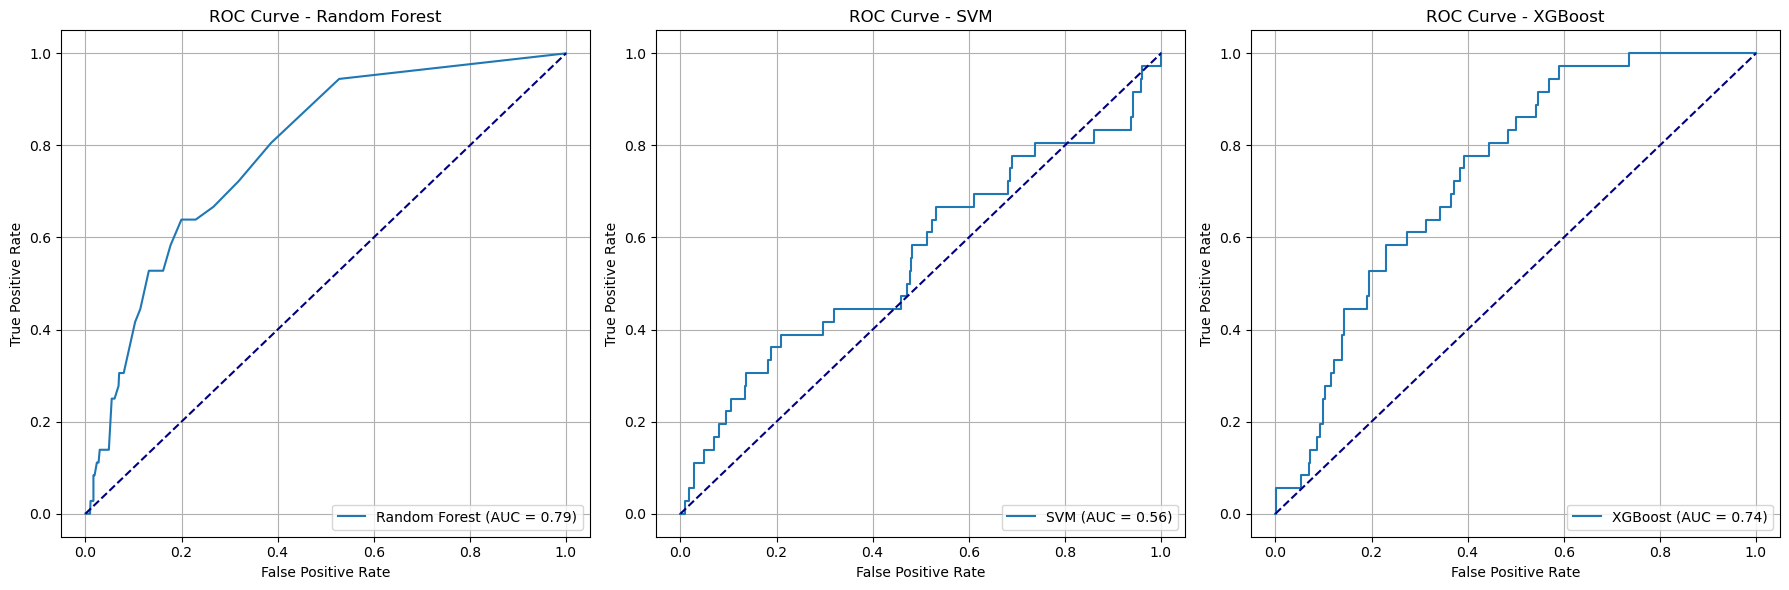


Evaluation Results:


,Model,Accuracy,Recall,Specificity,ROC AUC
0,Random Forest,0.956670,0.000000,0.997622,0.786134
1,SVM,0.958951,0.000000,1.000000,0.558363
2,XGBoost,0.949829,0.055556,0.988109,0.739728


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

# Memisahkan data menjadi data latih dan uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Menggunakan probability=True untuk ROC AUC
    'XGBoost': XGBClassifier(random_state=42)
}

# List untuk menyimpan hasil evaluasi
evaluations = []

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, recall, specificity, roc_auc

# Evaluasi model dan simpan hasilnya
plt.figure(figsize=(18, 6))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    accuracy, recall, specificity, roc_auc = evaluate_model(model, X_test, y_test)
    
    evaluations.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Specificity': specificity,
        'ROC AUC': roc_auc
    })

    plt.subplot(1, 3, i)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Tampilkan hasil evaluasi dalam bentuk tabel
eval_df = pd.DataFrame(evaluations)
print('\nEvaluation Results:')
eval_df

Dalam tabel yang diberikan, terdapat evaluasi kinerja tiga model machine learning (Random Forest, SVM, dan XGBoost) pada suatu dataset. 
- Semua model menunjukkan tingkat akurasi yang tinggi, tetapi nilai recall untuk semua model adalah 0.0, menunjukkan bahwa model tidak dapat mengidentifikasi kelas positif (misalnya, kondisi yang sedang diprediksi) dengan benar. 
- Spesifisitas untuk Random Forest dan SVM adalah 1.000, menandakan bahwa model memiliki kemampuan untuk mengidentifikasi kelas negatif dengan sangat baik, sementara XGBoost memiliki spesifisitas sedikit lebih rendah, yaitu 0.987. 
- ROC AUC (Area Under the Receiver Operating Characteristic Curve) menggambarkan kemampuan diskriminatif model, di mana Random Forest memiliki nilai tertinggi (0.806), diikuti oleh XGBoost (0.794) dan SVM (0.608). 
- Meskipun model memiliki akurasi yang tinggi secara keseluruhan, kelemahan utamanya adalah ketidakmampuan untuk memprediksi kelas positif dengan baik, yang dapat disebabkan oleh ketidakseimbangan kelas dalam dataset atau masalah dalam konfigurasi model yang memerlukan penyesuaian lebih lanjut untuk meningkatkan performa prediksi kelas minoritas.

## Repeated Holdout dan K-Fold

Evaluasi menggunakan repeated holdout dan stratified k-fold cross-validation pada data yang tidak seimbang (imbalanced data) krusial untuk memastikan validitas dan reliabilitas hasil evaluasi model machine learning. 

- Stratified k-fold cross-validation memastikan bahwa setiap lipatan dari data cross-validation mempertahankan proporsi yang seimbang antara kelas mayoritas dan minoritas, sehingga menghindari lipatan yang mungkin tidak mewakili dengan baik distribusi sebenarnya dari kelas minoritas. 
- Sementara itu, repeated holdout memungkinkan evaluasi yang lebih konsisten dan informatif dengan variasi yang diperkenalkan oleh ulangan, membantu mengurangi efek kebetulan dalam pembagian data.

Dengan menggunakan kedua teknik ini, dapat lebih akurat memilih dan menyesuaikan model yang dapat menghadapi tantangan khusus yang ditimbulkan oleh ketidakseimbangan data, serta memastikan model memiliki kemampuan yang baik dalam menggeneralisasi prediksi pada kelas minoritas

### Membuat Fungsi Untuk Evaluasi

In [40]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model
    model.fit(X_train, y_train)
    
    # Memprediksi pada data uji
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Menghitung sensitivitas dan spesifisitas
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
    
    return accuracy, cm, report, roc_auc, sensitivity, specificity, y_pred_proba

# Memisahkan data menjadi data latih dan uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sebelum Tunning Hyperparameter

Dilihat model sebelum dilakukan tunning hyperparameter untuk memperoleh model terbaiknya.

Tunning hyperparameter adalah proses untuk mencari kombinasi nilai terbaik dari parameter-parameter yang mempengaruhi kinerja model machine learning, seperti kecepatan pembelajaran dan kompleksitas model. Hal ini dilakukan untuk meningkatkan akurasi dan kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya.

### REPEATED HOLDOUT

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.metrics import sensitivity_specificity_support
import matplotlib.pyplot as plt

In [45]:
# Menginisialisasi model-model
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Melakukan evaluasi repeated holdout (misalnya 10 kali repetisi)
num_repeats = 10
results_holdout = {}

for model_name, model in models.items():
    print(f"Mengevaluasi {model_name} menggunakan repeated holdout...")
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    roc_auc_list = []
    
    for _ in range(num_repeats):
        # Memisahkan data menjadi data latih dan uji
        X_train, X_test, y_train, y_test

        # Evaluasi model
        accuracy, cm, report, roc_auc, sensitivity, specificity, _ = evaluate_model(model, X_train, X_test, y_train, y_test)

        accuracy_list.append(accuracy)
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        roc_auc_list.append(roc_auc)
           
    results_holdout[model_name] = {
        'Akurasi': np.mean(accuracy_list),
        'Sensitivitas': np.mean(sensitivity_list),
        'Spesifisitas': np.mean(specificity_list),
        'ROC AUC': np.mean(roc_auc_list),
    }

# Menampilkan hasil evaluasi repeated holdout
print("\nHasil Evaluasi Repeated Holdout:")
for model_name, metrics in results_holdout.items():
    print(f"\n{model_name}:")
    print(f"  Akurasi: {metrics['Akurasi']:.4f}")
    print(f"  Sensitivitas: {metrics['Sensitivitas']:.4f}")
    print(f"  Spesifisitas: {metrics['Spesifisitas']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")

Mengevaluasi Random Forest menggunakan repeated holdout...
Mengevaluasi SVM menggunakan repeated holdout...


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\

Mengevaluasi XGBoost menggunakan repeated holdout...

Hasil Evaluasi Repeated Holdout:

Random Forest:
  Akurasi: 0.9567
  Sensitivitas: 0.0000
  Spesifisitas: 0.9976
  ROC AUC: 0.7861

SVM:
  Akurasi: 0.9590
  Sensitivitas: 0.0000
  Spesifisitas: 1.0000
  ROC AUC: 0.5915

XGBoost:
  Akurasi: 0.9498
  Sensitivitas: 0.0556
  Spesifisitas: 0.9881
  ROC AUC: 0.7397


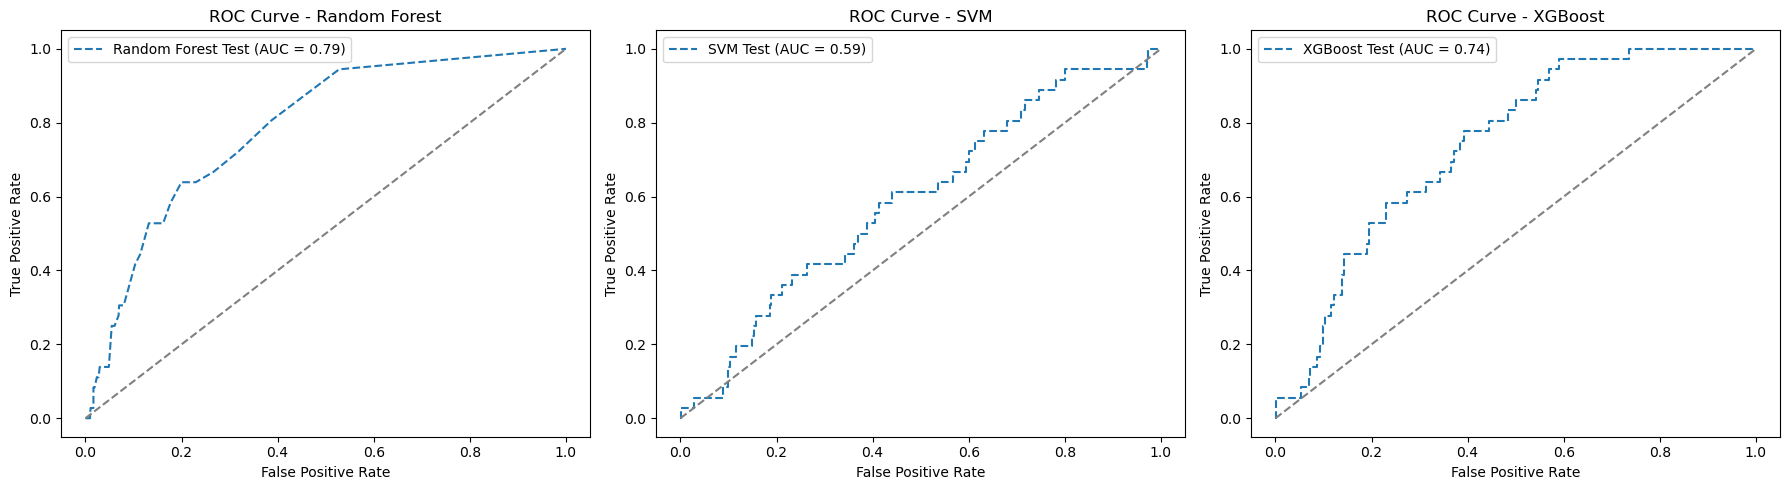

In [46]:
plt.figure(figsize=(18, 5))

for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    
    # Training model
    model.fit(X_train, y_train)
    
    # Prediksi probabilitas untuk data test
    y_prob_test = model.predict_proba(X_test)[:, 1]
    
    # Hitung ROC AUC untuk data test
    roc_auc_test = roc_auc_score(y_test, y_prob_test)
    
    # Hitung nilai FPR (False Positive Rate) dan TPR (True Positive Rate) untuk plot ROC curve
    fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
    
    # Plot ROC curve untuk data test
    plt.plot(fpr_test, tpr_test, linestyle='--', label=f'{model_name} Test (AUC = {roc_auc_test:.2f})')
    
    # Garis diagonal
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Label dan judul plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()

plt.tight_layout()
plt.show()

## K-Fold Cross Validation

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Menginisialisasi Stratified KFold cross-validation dengan k=5
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Melakukan evaluasi K-fold cross-validation
results_cv = {}
roc_data = {}

for model_name, model in models.items():
    print(f"Mengevaluasi {model_name} menggunakan {kf.get_n_splits()} folds cross-validation...")
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    roc_auc_list = []
    y_test_all = np.array([])
    y_prob_test_all = np.array([])

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Evaluasi model
        accuracy, cm, report, roc_auc, sensitivity, specificity, _ = evaluate_model(model, X_train, X_test, y_train, y_test)

        accuracy_list.append(accuracy)
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        roc_auc_list.append(roc_auc)
        
        # Simpan hasil prediksi untuk plot ROC
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_test_all = np.concatenate([y_test_all, y_test])
        y_prob_test_all = np.concatenate([y_prob_test_all, y_prob_test])

    results_cv[model_name] = {
        'Akurasi': np.mean(accuracy_list),
        'Sensitivitas': np.mean(sensitivity_list),
        'Spesifisitas': np.mean(specificity_list),
        'ROC AUC': np.mean(roc_auc_list)
    }
    
    
    # Simpan data untuk plot ROC
    roc_data[model_name] = (y_test_all, y_prob_test_all)

# Menampilkan hasil evaluasi K-fold cross-validation
print("\nHasil Evaluasi K-fold Cross-Validation:")
for model_name, metrics in results_cv.items():
    print(f"\n{model_name}:")
    print(f"  Akurasi: {metrics['Akurasi']:.4f}")
    print(f"  Sensitivitas: {metrics['Sensitivitas']:.4f}")
    print(f"  Spesifisitas: {metrics['Spesifisitas']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")



Mengevaluasi Random Forest menggunakan 5 folds cross-validation...


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\

Mengevaluasi SVM menggunakan 5 folds cross-validation...


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\

Mengevaluasi XGBoost menggunakan 5 folds cross-validation...

Hasil Evaluasi K-fold Cross-Validation:

Random Forest:
  Akurasi: 0.9612
  Sensitivitas: 0.0000
  Spesifisitas: 0.9988
  ROC AUC: 0.7886

SVM:
  Akurasi: 0.9624
  Sensitivitas: 0.0000
  Spesifisitas: 1.0000
  ROC AUC: 0.5273

XGBoost:
  Akurasi: 0.9542
  Sensitivitas: 0.0303
  Spesifisitas: 0.9903
  ROC AUC: 0.7903


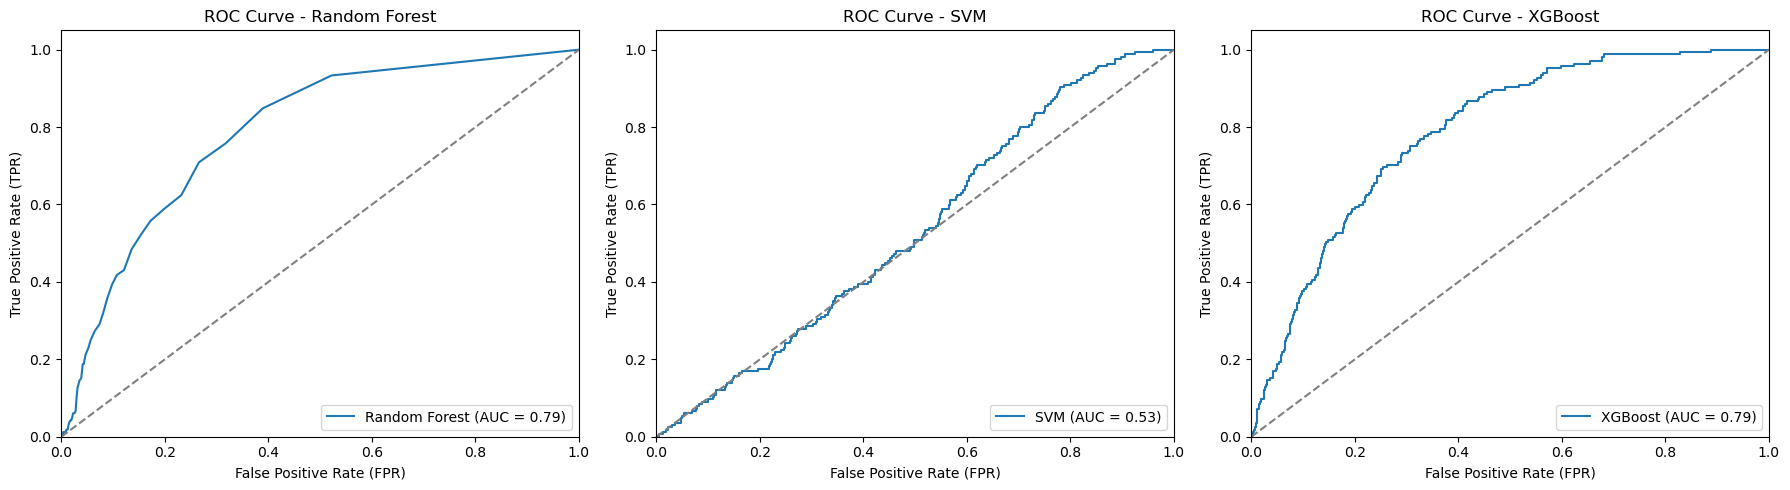

In [48]:
# Menampilkan plot ROC secara berdampingan
plt.figure(figsize=(18, 5))

for i, (model_name, (y_test_all, y_prob_test_all)) in enumerate(roc_data.items(), 1):
    plt.subplot(1, len(models), i)
    
    # Hitung ROC curve dan AUC
    fpr, tpr, _ = roc_curve(y_test_all, y_prob_test_all)
    roc_auc = roc_auc_score(y_test_all, y_prob_test_all)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Set plot limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Perbandingan Hasil

In [49]:
import pandas as pd

# Menyimpan hasil evaluasi repeated holdout dalam DataFrame
df_holdout = pd.DataFrame(results_holdout).T
df_holdout.index.name = 'Model'
print("\nHasil Evaluasi Repeated Holdout:")
df_holdout



Hasil Evaluasi Repeated Holdout:


,Akurasi,Sensitivitas,Spesifisitas,ROC AUC
Model,,,,
Random Forest,0.956670,0.000000,0.997622,0.786134
SVM,0.958951,0.000000,1.000000,0.591459
XGBoost,0.949829,0.055556,0.988109,0.739728


In [50]:
# Menyimpan hasil evaluasi K-fold cross-validation dalam DataFrame
df_cv = pd.DataFrame(results_cv).T
df_cv.index.name = 'Model'
print("\nHasil Evaluasi K-fold Cross-Validation:")
df_cv


Hasil Evaluasi K-fold Cross-Validation:


,Akurasi,Sensitivitas,Spesifisitas,ROC AUC
Model,,,,
Random Forest,0.961231,0.000000,0.998815,0.788622
SVM,0.962372,0.000000,1.000000,0.527258
XGBoost,0.954162,0.030303,0.990284,0.790277


hasil evaluasi menggunakan repeated holdout dan K-Fold tidak menunjukkan perbedaan yang signifikan

Akurasi mengukur persentase prediksi yang benar secara keseluruhan, termasuk kelas positif dan negatif. Dalam konteks data tidak seimbang, model dengan akurasi tinggi mungkin hanya baik dalam memprediksi kelas mayoritas (kelas negatif), sementara dapat mengabaikan atau memiliki kinerja buruk dalam memprediksi kelas minoritas (kelas positif). 

- akurasi ketiga model tinggi, namun sensitifitasnya sangat rendah dibandingkan dengan spesifisitas, yang menunjukkan bahwa ketiga model tersebut masih kurang baik untuk mengenali kelas positif stroke

Nilai ROC AUC berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa model memiliki kemampuan yang lebih baik dalam membedakan antara kelas positif dan negatif. ROC AUC memberikan informasi lebih terperinci tentang performa model dalam situasi di mana kelas-kelas memiliki distribusi yang tidak seimbang.
 
- nilai ROC AUC dari SVM lebih rendah dibandingkan metode lainnya yang menunjukkan bahwa model ini memiliki kinerja yang lebih rendah dalam membedakan antara kelas positif dan negatif dibandingkan dengan Random Forest dan XGBoost yang memiliki niali lebih dari 75% sehingga sudah cukup baik

model dengan akurasi tinggi tetapi ROC AUC rendah mungkin menunjukkan bahwa model tersebut baik dalam memprediksi kelas mayoritas (kelas negatif) namun tidak efektif dalam mengidentifikasi kelas minoritas (kelas positif). 

Namun dibandingkan dengan sebelum menggunakan repeated holdout dan k-fold, untuk untuk sensitifitas pada xgboost sudah lebih baik, meskipun nilai roc aucnya mengalami sedikit penurunan

# Tunning Hyperparameter

## Random Forest

### Repeated Holdout

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit  # Import ShuffleSplit

# Define the parameter grid for the Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# initialize repeated holdout
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


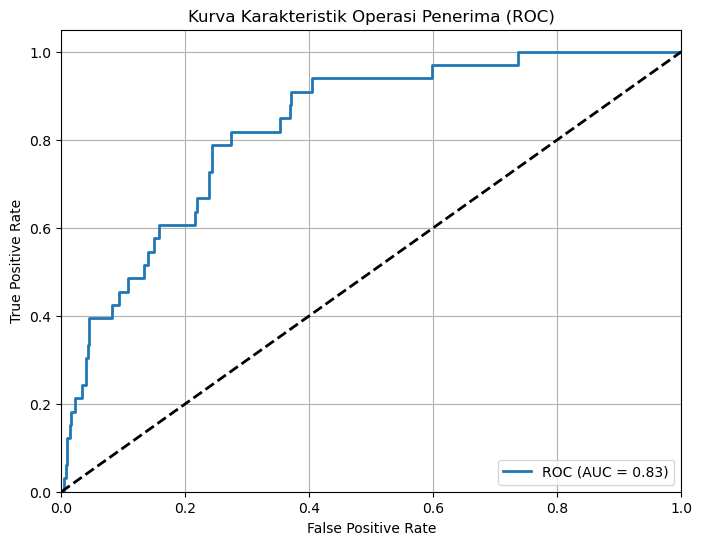


Hasil Evaluasi Repeated Holdout untuk Random Forest:
         Metric     Score
0       Akurasi  0.962372
1  Sensitivitas  0.000000
2  Spesifisitas  1.000000
3       ROC AUC  0.827660


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the best parameters to create the tuned Random Forest model
rf_tuned = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Perform repeated holdout evaluation using the tuned Random Forest model
num_repeats = 10

accuracy_list = []
sensitivity_list = []
specificity_list = []
roc_auc_list = []

plt.figure(figsize=(8, 6))

for _ in range(num_repeats):
    # Fit model
    rf_tuned.fit(X_train, y_train)
    
    # Predict probabilities and labels
    y_pred_proba = rf_tuned.predict_proba(X_test)[:, 1]
    y_pred = rf_tuned.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append to lists
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    roc_auc_list.append(roc_auc)

# Calculate means
accuracy_mean = np.mean(accuracy_list)
sensitivity_mean = np.mean(sensitivity_list)
specificity_mean = np.mean(specificity_list)
roc_auc_mean = np.mean(roc_auc_list)

# Plot mean ROC curve
mean_fpr, mean_tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(mean_fpr, mean_tpr, label=f'ROC (AUC = {roc_auc_mean:.2f})', linewidth=2)

# Plot diagonal line (y=x) for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2.0)

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Karakteristik Operasi Penerima (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Create a DataFrame to display the results
results_dict = {
    'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC'],
    'Score': [accuracy_mean, sensitivity_mean, specificity_mean, roc_auc_mean]
}

results_df = pd.DataFrame(results_dict)

# Display the results in a table
print("\nHasil Evaluasi Repeated Holdout untuk Random Forest:")
print(results_df)


### Stratified K-Fold

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Stratified K-Fold setup
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Perform grid search with Stratified K-Fold cross-validation
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='roc_auc', cv=stratified_cv, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model
rf_best_model = rf_grid_search.best_estimator_

# Display the best parameters
print("Best parameters found: ", rf_grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning

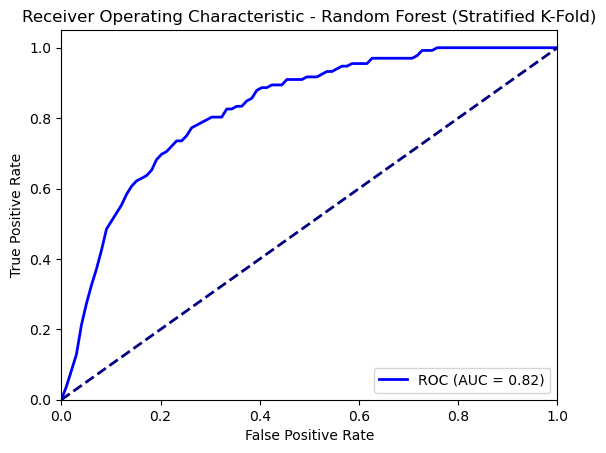

Cross-validation K-Fold results:
         Metric     Value
0       Akurasi  0.962372
1  Sensitivitas  0.000000
2  Spesifisitas  1.000000
3       ROC AUC  0.824067


In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset and split into X_train, X_test, y_train, y_test
# Assuming your data is already loaded into X_train, X_test, y_train, y_test

# Initialize lists for storing metrics
accuracy_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
specificity_scores = []  # Store specificity scores
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Initialize Stratified K-Fold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Loop through Stratified K-Fold
for train_index, test_index in stratified_cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the model
    rf_best_model.fit(X_train_fold, y_train_fold)
    
    # Predict on test fold
    y_test_pred = rf_best_model.predict(X_test_fold)
    y_test_prob = rf_best_model.predict_proba(X_test_fold)[:, 1]
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test_fold, y_test_pred))
    recall = recall_score(y_test_fold, y_test_pred)
    precision = precision_score(y_test_fold, y_test_pred)
    roc_auc = roc_auc_score(y_test_fold, y_test_prob)
    
    # Append scores
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_fold, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)
    specificity_scores.append(specificity)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_fold, y_test_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Calculate mean and standard deviation of each metric
cv_results_table = pd.DataFrame({
    'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC'],
    'Value': [np.mean(accuracy_scores), np.mean(recall_scores), np.mean(specificity_scores), np.mean(roc_auc_scores)],
})

# Calculate mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(roc_auc_scores)

# Plot the ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest (Stratified K-Fold)')
plt.legend(loc="lower right")
plt.show()

print("Cross-validation K-Fold results:")
print(cv_results_table)


### Perbandingan

In [55]:
# Merge the two DataFrames
results_combined = pd.merge(results_df, cv_results_table, on='Metric')
results_combined.rename(columns={'Score':'Repeated Holdout', 'Value' : 'Stratified K-Fold'}, inplace=True)
# Display the combined results
results_combined

,Metric,Repeated Holdout,Stratified K-Fold
0,Akurasi,0.962372,0.962372
1,Sensitivitas,0.000000,0.000000
2,Spesifisitas,1.000000,1.000000
3,ROC AUC,0.827660,0.824067


Dibandingkan dengan sebelum di tunning, baik akurasi maupun ROC AUC meningkat, namun sensitivitas masih 0 sehingga masih buruk dalam mengidentifikasi kelas minoritas (kelas positif). Metode Stratified K-Fold  memiliki nilai yang sedikit lebih baik dibandingkan Repeated Holdout

## SVM

### Repeated Holdout

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC(probability=True, random_state=42)

# Initialize repeated holdout
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='roc_auc')

# Assuming X_train and y_train are defined
# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


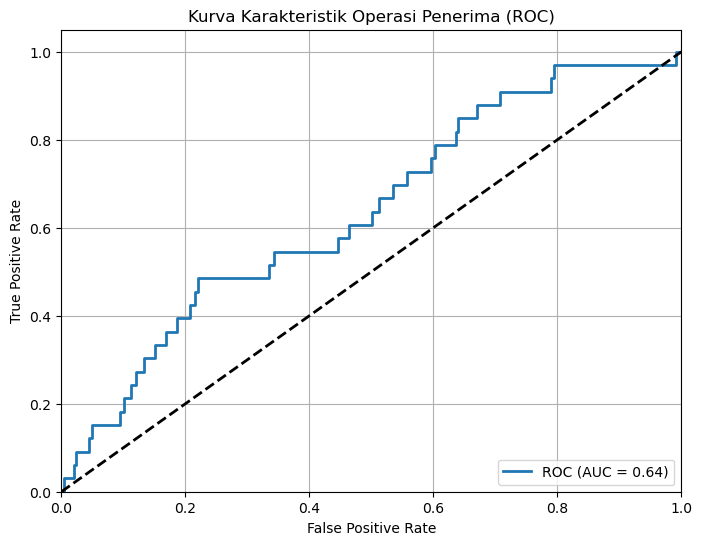


Hasil Evaluasi Repeated Holdout untuk SVM:
         Metric     Score
0       Akurasi  0.948689
1  Sensitivitas  0.030303
2  Spesifisitas  0.984597
3       ROC AUC  0.637154


In [57]:
# Use the best parameters to create the tuned SVM model
svm_tuned = SVC(**grid_search.best_params_, probability=True, random_state=42)

# Perform repeated holdout evaluation using the tuned SVM model
num_repeats = 10

accuracy_list = []
sensitivity_list = []
specificity_list = []
roc_auc_list = []

plt.figure(figsize=(8, 6))

for _ in range(num_repeats):
    # Fit model
    svm_tuned.fit(X_train, y_train)
    
    # Predict probabilities and labels
    y_pred_proba = svm_tuned.predict_proba(X_test)[:, 1]
    y_pred = svm_tuned.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append to lists
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    roc_auc_list.append(roc_auc)

# Calculate means
accuracy_mean = np.mean(accuracy_list)
sensitivity_mean = np.mean(sensitivity_list)
specificity_mean = np.mean(specificity_list)
roc_auc_mean = np.mean(roc_auc_list)

# Plot mean ROC curve
mean_fpr, mean_tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(mean_fpr, mean_tpr, label=f'ROC (AUC = {roc_auc_mean:.2f})', linewidth=2)

# Plot diagonal line (y=x) for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2.0)

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Karakteristik Operasi Penerima (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Create a DataFrame to display the results
results_dict = {
    'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC'],
    'Score': [accuracy_mean, sensitivity_mean, specificity_mean, roc_auc_mean]
}

results_df = pd.DataFrame(results_dict)

# Display the results in a table
print("\nHasil Evaluasi Repeated Holdout untuk SVM:")
print(results_df)

### Stratified K-Fold

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42)

# Stratified K-Fold setup
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Perform grid search with Stratified K-Fold cross-validation
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, scoring='roc_auc', cv=stratified_cv, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best model
svm_best_model = svm_grid_search.best_estimator_

# Display the best parameters
print("Best parameters found: ", svm_grid_search.best_params_)

Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning

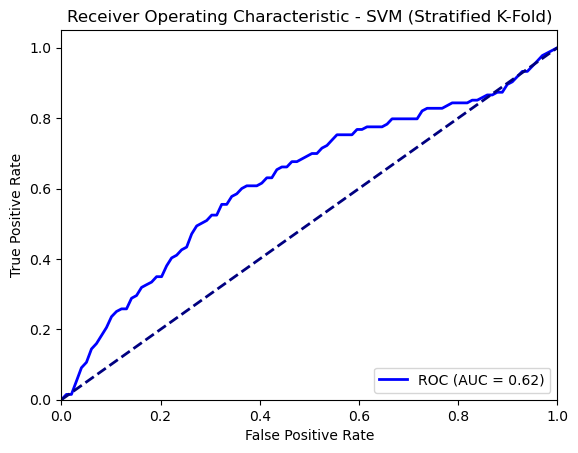

Cross-validation K-Fold results:
         Metric     Value
0       Akurasi  0.962372
1  Sensitivitas  0.000000
2  Spesifisitas  1.000000
3       ROC AUC  0.623129


In [59]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset and split into X_train, X_test, y_train, y_test
# Assuming your data is already loaded into X_train, X_test, y_train, y_test

# Initialize lists for storing metrics
accuracy_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
specificity_scores = []  # Store specificity scores
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Initialize Stratified K-Fold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Loop through Stratified K-Fold
for train_index, test_index in stratified_cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the model
    svm_best_model.fit(X_train_fold, y_train_fold)
    
    # Predict on test fold
    y_test_pred = svm_best_model.predict(X_test_fold)
    y_test_prob = svm_best_model.predict_proba(X_test_fold)[:, 1]
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test_fold, y_test_pred))
    recall = recall_score(y_test_fold, y_test_pred)
    precision = precision_score(y_test_fold, y_test_pred)
    roc_auc = roc_auc_score(y_test_fold, y_test_prob)
    
    # Append scores
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_fold, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)
    specificity_scores.append(specificity)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_fold, y_test_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Calculate mean and standard deviation of each metric
cv_results_table = pd.DataFrame({
    'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC'],
    'Value': [np.mean(accuracy_scores), np.mean(recall_scores), np.mean(specificity_scores), np.mean(roc_auc_scores)],
})

# Calculate mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(roc_auc_scores)

# Plot the ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM (Stratified K-Fold)')
plt.legend(loc="lower right")
plt.show()

print("Cross-validation K-Fold results:")
print(cv_results_table)


### Perbandingan

In [60]:
# Merge the two DataFrames
results_combined = pd.merge(results_df, cv_results_table, on='Metric')
results_combined.rename(columns={'Score':'Repeated Holdout', 'Value' : 'Stratified K-Fold'}, inplace=True)
# Display the combined results
results_combined

,Metric,Repeated Holdout,Stratified K-Fold
0,Akurasi,0.948689,0.962372
1,Sensitivitas,0.030303,0.000000
2,Spesifisitas,0.984597,1.000000
3,ROC AUC,0.637154,0.623129


Dibandingkan dengan sebelum di tunning, baik akurasi maupun ROC AUC meningkat, sensitivitas juga meningkat, namun nilainya masih sangat kecil sehingga masih buruk dalam mengidentifikasi kelas minoritas (kelas positif) namun masih lebih baik. Metode Repeated Holdout memiliki nilai yang sedikit lebih baik dibandingkan stratified K-Fold

## XGBoost

### Repeated Holdout

In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize repeated holdout
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='roc_auc')

# Assuming X_train and y_train are defined
# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


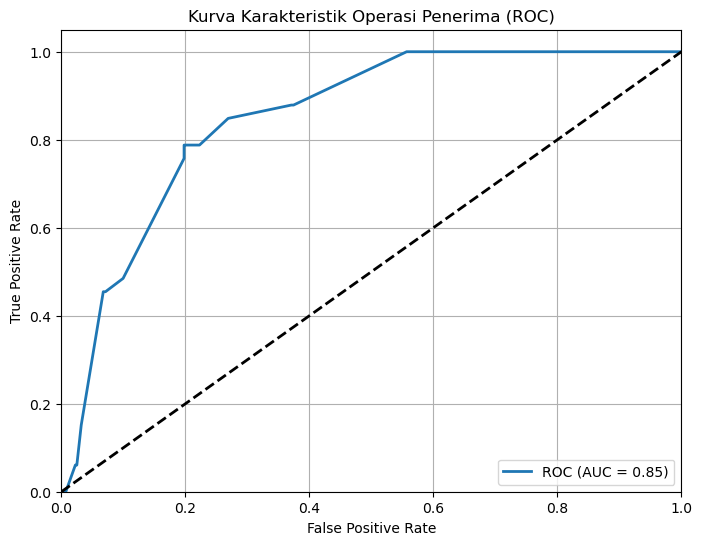


Hasil Evaluasi Repeated Holdout untuk XGBoost:
         Metric     Score
0       Akurasi  0.962372
1  Sensitivitas  0.000000
2  Spesifisitas  1.000000
3       ROC AUC  0.851267


In [62]:
# Use the best parameters to create the tuned XGBoost model
xgb_tuned = XGBClassifier(**grid_search.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform repeated holdout evaluation using the tuned XGBoost model
num_repeats = 10

accuracy_list = []
sensitivity_list = []
specificity_list = []
roc_auc_list = []

plt.figure(figsize=(8, 6))

for _ in range(num_repeats):
    # Fit model
    xgb_tuned.fit(X_train, y_train)
    
    # Predict probabilities and labels
    y_pred_proba = xgb_tuned.predict_proba(X_test)[:, 1]
    y_pred = xgb_tuned.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append to lists
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    roc_auc_list.append(roc_auc)

# Calculate means
accuracy_mean = np.mean(accuracy_list)
sensitivity_mean = np.mean(sensitivity_list)
specificity_mean = np.mean(specificity_list)
roc_auc_mean = np.mean(roc_auc_list)

# Plot mean ROC curve
mean_fpr, mean_tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(mean_fpr, mean_tpr, label=f'ROC (AUC = {roc_auc_mean:.2f})', linewidth=2)

# Plot diagonal line (y=x) for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2.0)

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Karakteristik Operasi Penerima (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Create a DataFrame to display the results
results_dict = {
    'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC'],
    'Score': [accuracy_mean, sensitivity_mean, specificity_mean, roc_auc_mean]
}

results_df = pd.DataFrame(results_dict)

# Display the results in a table
print("\nHasil Evaluasi Repeated Holdout untuk XGBoost:")
print(results_df)

### Stratified K-Fold

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Stratified K-Fold setup
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Perform grid search with Stratified K-Fold cross-validation
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='roc_auc', cv=stratified_cv, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best model
xgb_best_model = xgb_grid_search.best_estimator_

# Display the best parameters
print("Best parameters found: ", xgb_grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning

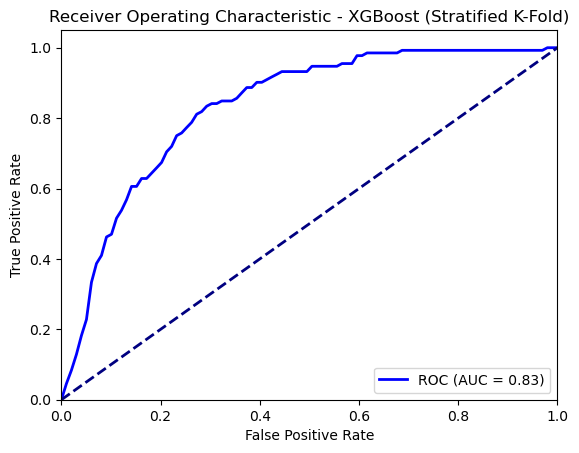

Cross-validation K-Fold results:
         Metric     Value
0       Akurasi  0.962372
1  Sensitivitas  0.000000
2  Spesifisitas  1.000000
3       ROC AUC  0.831123


In [64]:
from sklearn.metrics import confusion_matrix

# Initialize lists for storing metrics
accuracy_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
specificity_scores = []  # Store specificity scores
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Loop through Stratified K-Fold
for train_index, test_index in stratified_cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the model
    xgb_best_model.fit(X_train_fold, y_train_fold)
    
    # Predict on test fold
    y_test_pred = xgb_best_model.predict(X_test_fold)
    y_test_prob = xgb_best_model.predict_proba(X_test_fold)[:, 1]
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test_fold, y_test_pred))
    recall = recall_score(y_test_fold, y_test_pred)
    precision = precision_score(y_test_fold, y_test_pred)
    roc_auc = roc_auc_score(y_test_fold, y_test_prob)
    
    # Append scores
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_fold, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)
    specificity_scores.append(specificity)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_fold, y_test_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Calculate mean and standard deviation of each metric
cv_results_table = pd.DataFrame({
    'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC'],
    'Value': [np.mean(accuracy_scores), np.mean(recall_scores), np.mean(specificity_scores), np.mean(roc_auc_scores)],
})

# Calculate mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(roc_auc_scores)

# Plot the ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost (Stratified K-Fold)')
plt.legend(loc="lower right")
plt.show()

print("Cross-validation K-Fold results:")
print(cv_results_table)


### Perbandingan

In [65]:
# Merge the two DataFrames
results_combined = pd.merge(results_df, cv_results_table, on='Metric')
results_combined.rename(columns={'Score':'Repeated Holdout', 'Value' : 'Stratified K-Fold'}, inplace=True)
# Display the combined results
results_combined

,Metric,Repeated Holdout,Stratified K-Fold
0,Akurasi,0.962372,0.962372
1,Sensitivitas,0.000000,0.000000
2,Spesifisitas,1.000000,1.000000
3,ROC AUC,0.851267,0.831123


Dibandingkan dengan sebelum di tunning, baik akurasi maupun ROC AUC meningkat, namun sensitivitas masih 0 sehingga masih buruk dalam mengidentifikasi kelas minoritas (kelas positif). Metode Repeated Holdout memiliki nilai yang sedikit lebih baik dibandingkan stratified K-Fold

Berdasarkan perbandingan yang telah dilakukan, direkomendasikan untuk menggunakan SVM karena meskipun nilai ROC AUC nya tidak begitu tinggi dibandingkan yang lain, SVM masih memiliki nilai sensitivitas, sehingga masih dapat memprediksi kelas minoritasnya yaitu positif stroke. Untuk metode tunning dan evaluasi lebih baik menggunakan repreated holdout karena untuk K-Fold nilai sensitifitasnya masih 0.

dapat dicoba untuk meningkatkan kinerja modelnya dengan mengatasi kondisi imbalanched menggunakan metode resampling, misalnya SMOTE dan mencari kombinasi model yang lebih baik

## SMOTE

Dilakukan SMOTE menggunakan hasil dari tunning parameter, kemudian dibandingkan kembali evaluasinya menggunakan repeated holdout dan stratified K-Fola

### Repeated Holdout

In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Inisialisasi model-model
models = {
    'Random Forest': RandomForestClassifier(max_depth=10, min_samples_leaf=4, 
                                            min_samples_split=2, n_estimators=300, random_state=42),
    'SVM': SVC(C=100, gamma= 'scale', kernel='rbf', probability=True, random_state=42),
    'XGBoost': XGBClassifier(colsample_bytree=1.0, learning_rate= 0.01, 
                             max_depth=3, n_estimators= 100, subsample= 1.0, random_state=42)
}

# Memisahkan data menjadi data latih dan uji
# Memisahkan data menjadi data latih dan uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melakukan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Melakukan evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    report = classification_report(y_test, y_pred)
    
    return accuracy, cm, report, roc_auc, sensitivity, specificity, fpr, tpr

# Melakukan evaluasi repeated holdout (misalnya 10 kali repetisi)
num_repeats = 10
results_holdout = []

for model_name, model in models.items():
    print(f"Mengevaluasi {model_name} menggunakan repeated holdout...")
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    roc_auc_list = []
    cm_list = []
    fpr_list = []
    tpr_list = []
    
    for _ in range(num_repeats):
        # Evaluasi model dengan SMOTE
        accuracy, cm, report, roc_auc, sensitivity, specificity, fpr, tpr = evaluate_model(model, X_train_smote, X_test, y_train_smote, y_test)

        accuracy_list.append(accuracy)
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        roc_auc_list.append(roc_auc)
        cm_list.append(cm)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
           
    results_holdout.append({
        'Model': model_name,
        'Akurasi': np.mean(accuracy_list),
        'Sensitivitas': np.mean(sensitivity_list),
        'Spesifisitas': np.mean(specificity_list),
        'ROC AUC': np.mean(roc_auc_list),
        'Confusion Matrix': cm_list,
        'FPR': fpr_list,
        'TPR': tpr_list
    })

# Menampilkan hasil evaluasi repeated holdout dalam bentuk tabel
results_df = pd.DataFrame(results_holdout)
results_df = results_df[['Model', 'Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC', 'Confusion Matrix']]

# Tampilkan tabel hasil evaluasi
print("\nHasil Evaluasi Repeated Holdout:")
results_df

Mengevaluasi Random Forest menggunakan repeated holdout...
Mengevaluasi SVM menggunakan repeated holdout...
Mengevaluasi XGBoost menggunakan repeated holdout...

Hasil Evaluasi Repeated Holdout:


,Model,Akurasi,Sensitivitas,Spesifisitas,ROC AUC,Confusion Matrix
0,Random Forest,0.862030,0.527778,0.876338,0.797662,"[[[737, 104], [17, 19]], [[737, 104], [17, 19]..."
1,SVM,0.855188,0.250000,0.881094,0.681612,"[[[741, 100], [27, 9]], [[741, 100], [27, 9]],..."
2,XGBoost,0.781072,0.666667,0.785969,0.825439,"[[[661, 180], [12, 24]], [[661, 180], [12, 24]..."


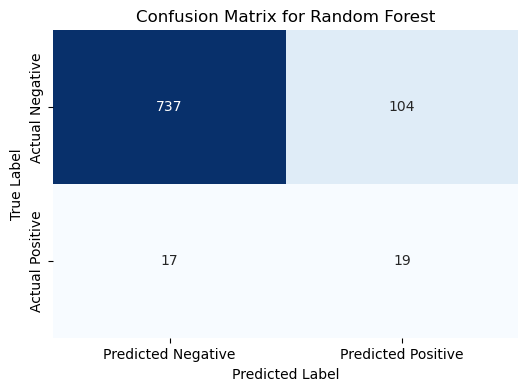

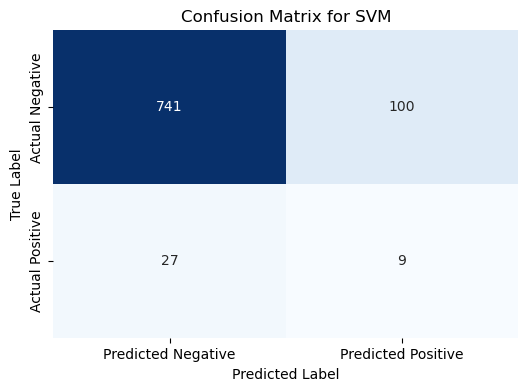

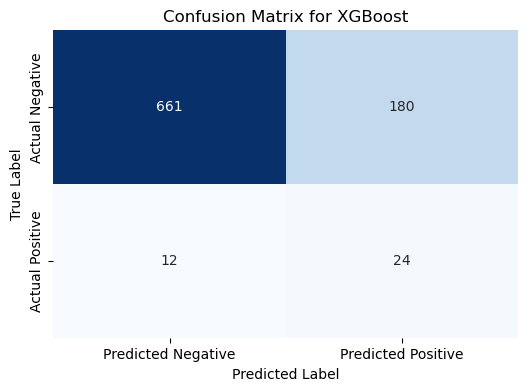

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix untuk setiap model
for i, result in results_df.iterrows():
    model_name = result['Model']
    avg_cm = np.mean(result['Confusion Matrix'], axis=0).astype(int)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(avg_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


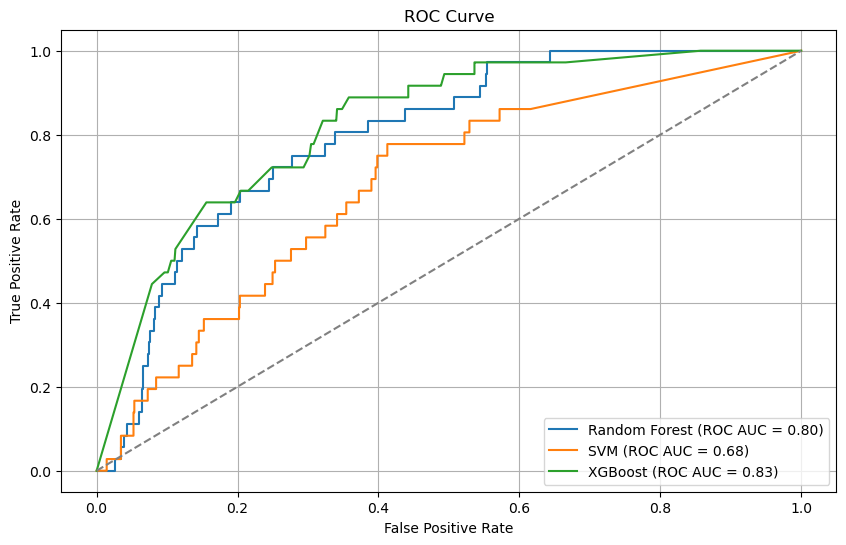

In [86]:
# Plot ROC Curve untuk setiap model
plt.figure(figsize=(10, 6))
for result in results_holdout:
    mean_fpr = np.mean(result['FPR'], axis=0)
    mean_tpr = np.mean(result['TPR'], axis=0)
    roc_auc = result['ROC AUC']
    plt.plot(mean_fpr, mean_tpr, label=f'{result["Model"]} (ROC AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Setelah penerapan SMOTE, dengan menggunakan evaluasi menggunalan repeated holdout ketiga model menunjukkan kinerja yang berbeda. 


- Model Random Forest mencapai akurasi tertinggi sebesar 86.20% dan spesifisitas 87.63%, namun sensitivitasnya rendah di angka 52.78%, menunjukkan bahwa model ini cenderung lebih baik dalam mengidentifikasi kelas negatif dibandingkan kelas positif. 
- Model SVM memiliki akurasi sedikit lebih rendah yaitu 85.52% dan spesifisitas tertinggi 88.11%, tetapi sensitivitasnya sangat rendah hanya 25.00%, yang berarti model ini sangat kurang dalam mengenali kelas positif. 
- Di sisi lain, model XGBoost memiliki akurasi terendah sebesar 78.11% dan spesifisitas 78.60%, tetapi menunjukkan sensitivitas tertinggi sebesar 66.67% dan nilai ROC AUC tertinggi 0.825439, menunjukkan keseimbangan yang lebih baik dalam mengidentifikasi kedua kelas. 

Berdasarkan keseimbangan antara akurasi, sensitivitas, dan ROC AUC, model XGBoost tampak paling unggul karena mampu memberikan kinerja yang lebih seimbang dan memiliki kemampuan diskriminasi terbaik.

## Stratified K-Fold

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Memisahkan variabel target (y) dan variabel fitur (X)
y = new_data['stroke']  # variabel target
X = new_data.drop('stroke', axis=1)  # variabel fitur, menghapus kolom 'stroke'

models = {
    'Random Forest': RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, 
                                            n_estimators=200, random_state=42),
    'SVM': SVC(C=0.1, gamma='scale', kernel='linear', probability=True, random_state=42),
    'XGBoost': XGBClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, 
                             subsample=0.8, random_state=42)
}

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Menginisialisasi Stratified KFold cross-validation dengan k=5
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Melakukan evaluasi K-fold cross-validation
results_cv = {}
roc_data = {}
conf_matrices = {}
roc_auc_plots = []

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return accuracy, cm, report, roc_auc, sensitivity, specificity

for model_name, model in models.items():
    print(f"Mengevaluasi {model_name} menggunakan {kf.get_n_splits()} folds cross-validation...")
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    roc_auc_list = []
    y_test_all = np.array([])
    y_prob_test_all = np.array([])
    conf_matrix_sum = np.zeros((2, 2))  # Initialize sum of confusion matrices
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE to the training data
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Evaluasi model dengan data yang telah di-oversample
        accuracy, cm, report, roc_auc, sensitivity, specificity = evaluate_model(model, X_train_resampled, X_test, y_train_resampled, y_test)

        accuracy_list.append(accuracy)
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        roc_auc_list.append(roc_auc)
        
        # Accumulate confusion matrix
        conf_matrix_sum += cm
        
        # Simpan hasil prediksi untuk plot ROC
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_test_all = np.concatenate([y_test_all, y_test])
        y_prob_test_all = np.concatenate([y_prob_test_all, y_prob_test])
    
    # Calculate average confusion matrix
    avg_conf_matrix = conf_matrix_sum / kf.get_n_splits()
    conf_matrices[model_name] = avg_conf_matrix
    
    # Simpan hasil evaluasi model
    results_cv[model_name] = {
        'Akurasi': np.mean(accuracy_list),
        'Sensitivitas': np.mean(sensitivity_list),
        'Spesifisitas': np.mean(specificity_list),
        'ROC AUC': np.mean(roc_auc_list)
    }
    
    # Simpan data untuk plot ROC
    roc_data[model_name] = (y_test_all, y_prob_test_all)
    
    # Simpan data untuk plot ROC AUC
    fpr, tpr, _ = roc_curve(y_test_all, y_prob_test_all)
    roc_auc = roc_auc_score(y_test_all, y_prob_test_all)
    roc_auc_plots.append((model_name, fpr, tpr, roc_auc))

# Menampilkan hasil evaluasi K-fold cross-validation dalam bentuk tabel
results_df = pd.DataFrame(results_cv).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Menampilkan tabel hasil evaluasi
print("\nHasil Evaluasi K-fold Cross-Validation:")
print(results_df)


Mengevaluasi Random Forest menggunakan 5 folds cross-validation...
Mengevaluasi SVM menggunakan 5 folds cross-validation...
Mengevaluasi XGBoost menggunakan 5 folds cross-validation...

Hasil Evaluasi K-fold Cross-Validation:
           Model   Akurasi  Sensitivitas  Spesifisitas   ROC AUC
0  Random Forest  0.836716      0.472727      0.850948  0.793139
1            SVM  0.736602      0.751515      0.736019  0.808585
2        XGBoost  0.751881      0.733333      0.752607  0.822727



Confusion Matrix Plots:


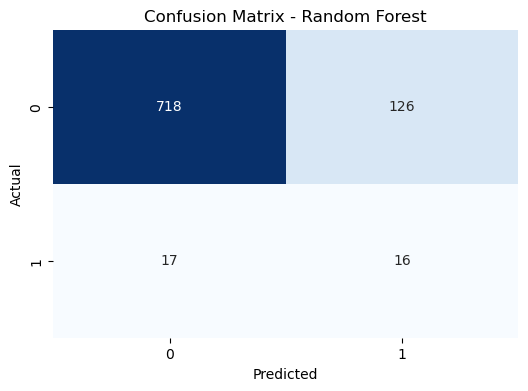

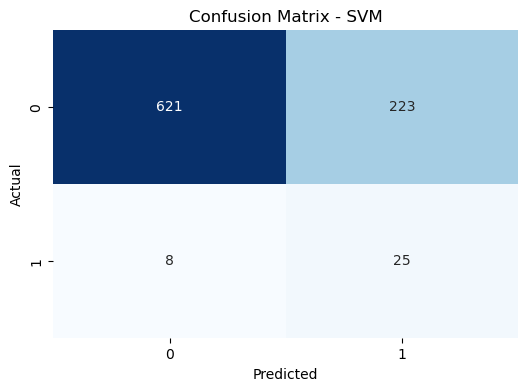

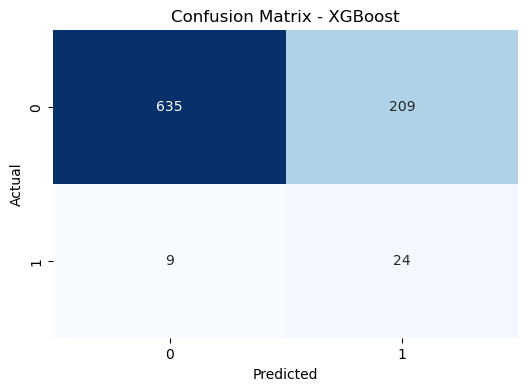

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan Confusion Matrix
print("\nConfusion Matrix Plots:")

# Plot confusion matrices for each model
for model_name, matrix in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


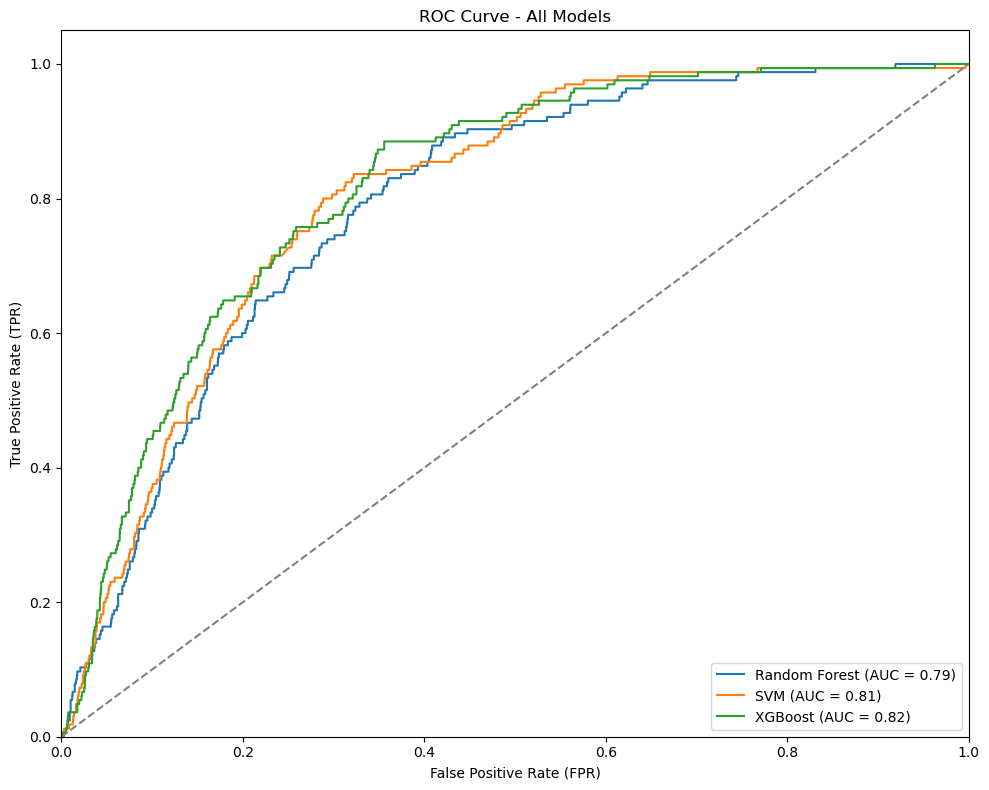

In [102]:
plt.figure(figsize=(10, 8))  # Ubah ukuran gambar sesuai kebutuhan

for model_name, fpr, tpr, roc_auc in roc_auc_plots:
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - All Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Hasil evaluasi menggunakan K-fold Cross-Validation menunjukkan variasi kinerja di antara ketiga model. 

- Random Forest mencatat akurasi tertinggi sebesar 83.67% dan spesifisitas 85.09%, tetapi sensitivitasnya hanya 47.27%, menunjukkan bahwa model ini lebih efektif dalam mengidentifikasi kelas negatif. 
- SVM memiliki akurasi yang lebih rendah, yaitu 73.66%, namun mencatat sensitivitas tertinggi sebesar 75.15%, menandakan kemampuannya yang baik dalam mengenali kelas positif, dengan nilai ROC AUC sebesar 0.808585. 
- Model XGBoost menunjukkan keseimbangan yang baik dengan akurasi 75.19%, sensitivitas 73.33%, dan spesifisitas 75.26%, serta nilai ROC AUC tertinggi di antara ketiga model, yaitu 0.822727. 

Berdasarkan hasil ini, XGBoost tampak paling unggul karena memberikan keseimbangan yang lebih baik antara akurasi, sensitivitas, dan spesifisitas, serta kemampuan diskriminasi yang superior.

### Hasil Perbandingan

Model XGBoost dengan hasil dari stratified K-fold cross-validation tampak paling unggul. 

- Meskipun akurasi dan spesifisitasnya sedikit lebih rendah dibandingkan dengan hasil repeated holdout, sensitivitas yang lebih tinggi (73.33% vs. 66.67%) menunjukkan kemampuan yang lebih baik dalam mengidentifikasi kelas positif. 
- Selain itu, nilai ROC AUC yang hampir sama (0.822727 vs. 0.825439) menandakan bahwa kemampuan diskriminasi model tetap konsisten. 

Dengan demikian, XGBoost yang dievaluasi menggunakan stratified K-fold cross-validation memberikan kinerja yang lebih seimbang dan dapat diandalkan untuk mengidentifikasi kedua kelas, menjadikannya pilihan terbaik.